* Attribute Information:

* date time year-month-day hour:minute:second
* Appliances, energy use in Wh
* lights, energy use of light fixtures in the house in Wh
* T1, Temperature in kitchen area, in Celsius
* RH_1, Humidity in kitchen area, in %
* T2, Temperature in living room area, in Celsius
* RH_2, Humidity in living room area, in %
* T3, Temperature in laundry room area
* RH_3, Humidity in laundry room area, in %
* T4, Temperature in office room, in Celsius
* RH_4, Humidity in office room, in %
* T5, Temperature in bathroom, in Celsius
* RH_5, Humidity in bathroom, in %
* T6, Temperature outside the building (north side), in Celsius
* RH_6, Humidity outside the building (north side), in %
* T7, Temperature in ironing room , in Celsius
* RH_7, Humidity in ironing room, in %
* T8, Temperature in teenager room 2, in Celsius
* RH_8, Humidity in teenager room 2, in %
* T9, Temperature in parents room, in Celsius
* RH_9, Humidity in parents room, in %
* To, Temperature outside (from Chievres weather station), in Celsius
* Pressure (from Chievres weather station), in mm Hg
* RH_out, Humidity outside (from Chievres weather station), in %
* Wind speed (from Chievres weather station), in m/s
* Visibility (from Chievres weather station), in km
* Tdewpoint (from Chievres weather station), Â°C
* rv1, Random variable 1, nondimensional
* rv2, Random variable 2, nondimensional

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data= pd.read_csv("energydata_complete.csv")

In [3]:
data.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
data.shape

(19735, 29)

In [6]:
data['year']=pd.DatetimeIndex(data['date']).year

In [7]:
data['year'].unique()

array([2016], dtype=int64)

In [8]:
data['month']=pd.DatetimeIndex(data['date']).month

In [9]:
data['month'].unique()

array([11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

# Total unique value:

In [11]:
data.nunique()

date           19735
Appliances        92
lights             8
T1               722
RH_1            2547
T2              1650
RH_2            3376
T3              1426
RH_3            2618
T4              1390
RH_4            2987
T5              2263
RH_5            7571
T6              4446
RH_6            9708
T7              1955
RH_7            5891
T8              2228
RH_8            6649
T9               924
RH_9            3388
T_out           1055
Press_mm_hg     2189
RH_out           566
Windspeed        189
Visibility       412
Tdewpoint       1118
rv1            19735
rv2            19735
year               1
month             12
dtype: int64

# Total Missing values:

In [12]:
data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
year           0
month          0
dtype: int64

# Summary Statistics:

In [13]:
summary= data.describe()
summary

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,year,month
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.0,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033,2016.0,4.253914
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634,0.0,2.976604
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,2016.0,1.000000
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,2016.0,2.000000
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653,2016.0,4.000000
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769,2016.0,5.000000
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,2016.0,12.000000


# Exploratory Data Analysis:

# Univariate Analysis:

# Boxplot:

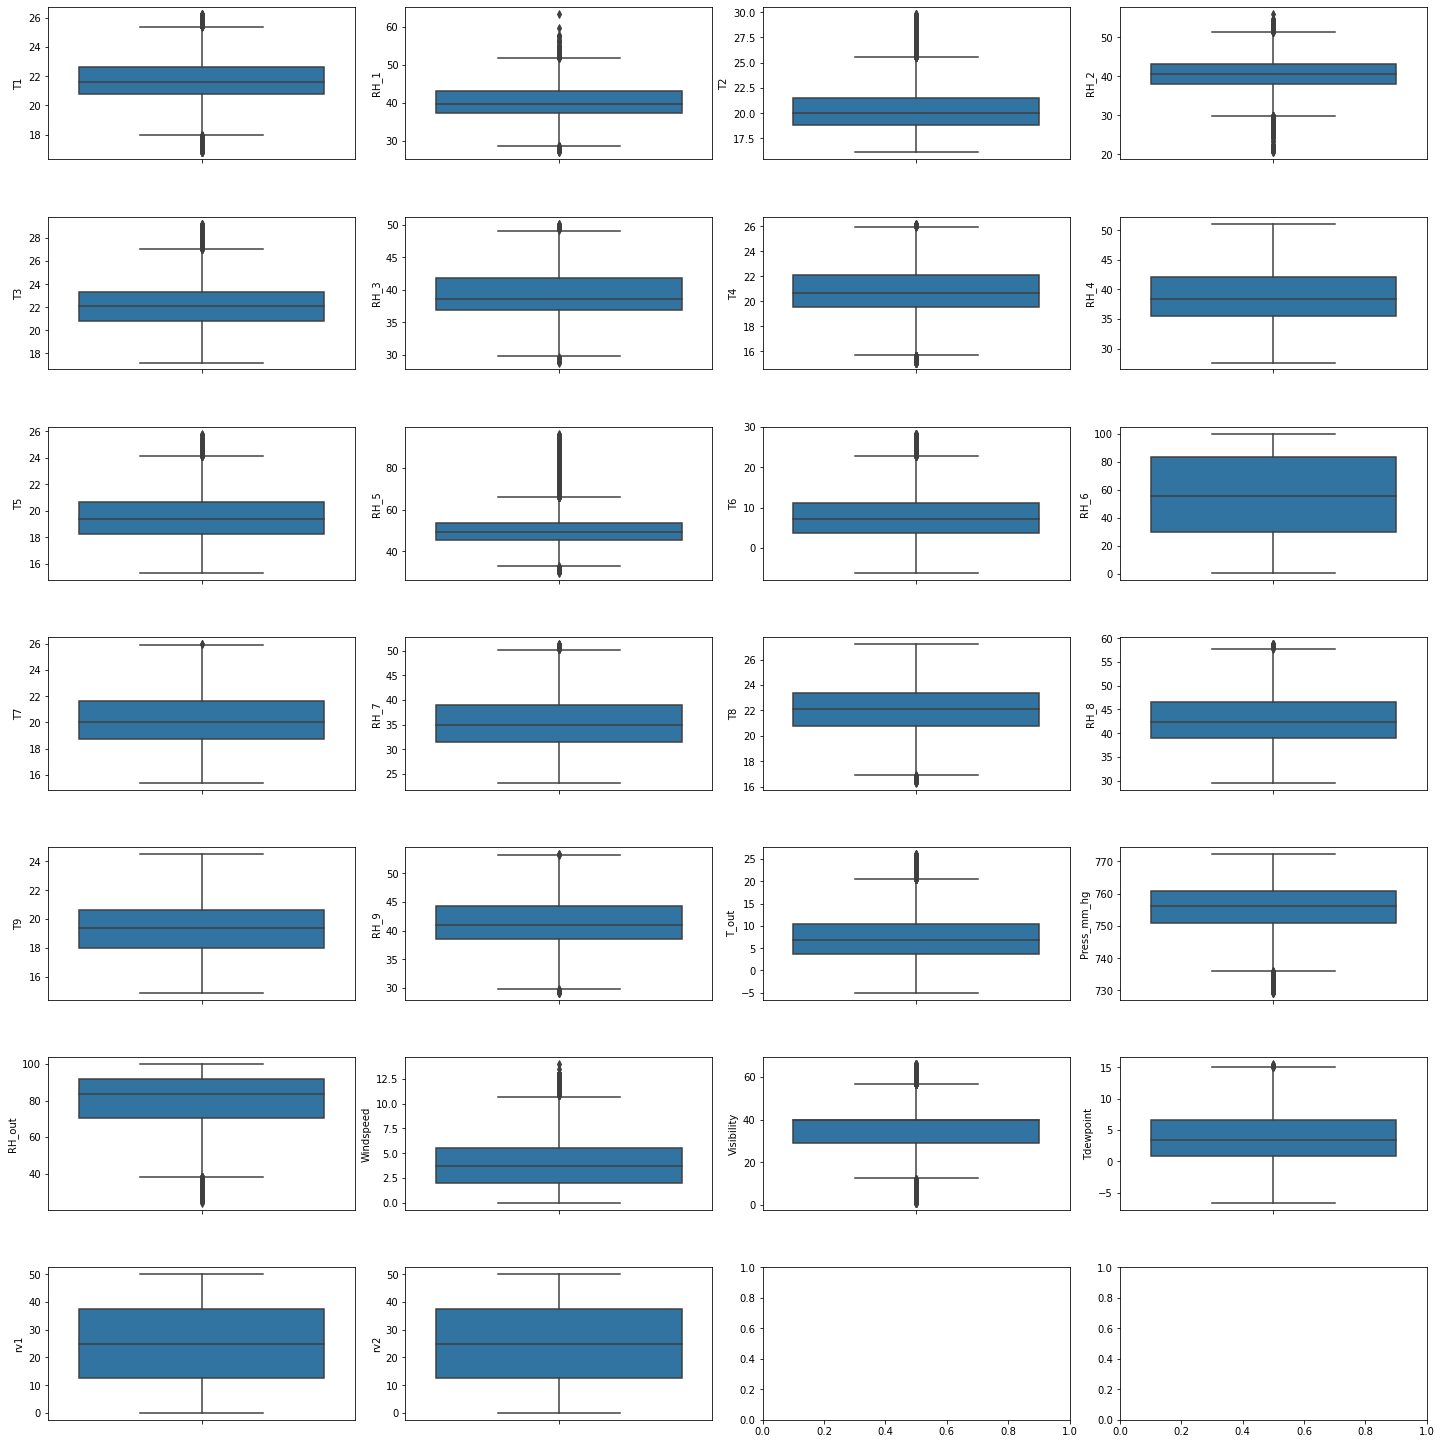

In [15]:
fig, ax = plt.subplots(ncols = 4, nrows = 7, figsize = (20,20))
index = 0
ax = ax.flatten()

for col, value in data.drop(columns=['date','Appliances','lights','year','month']).items():
    if col != 'type':
        sns.boxplot(y=col, data = data.drop(columns=['date','Appliances','lights','year','month']), ax = ax[index])
        index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0) 

# Distribution Plot:

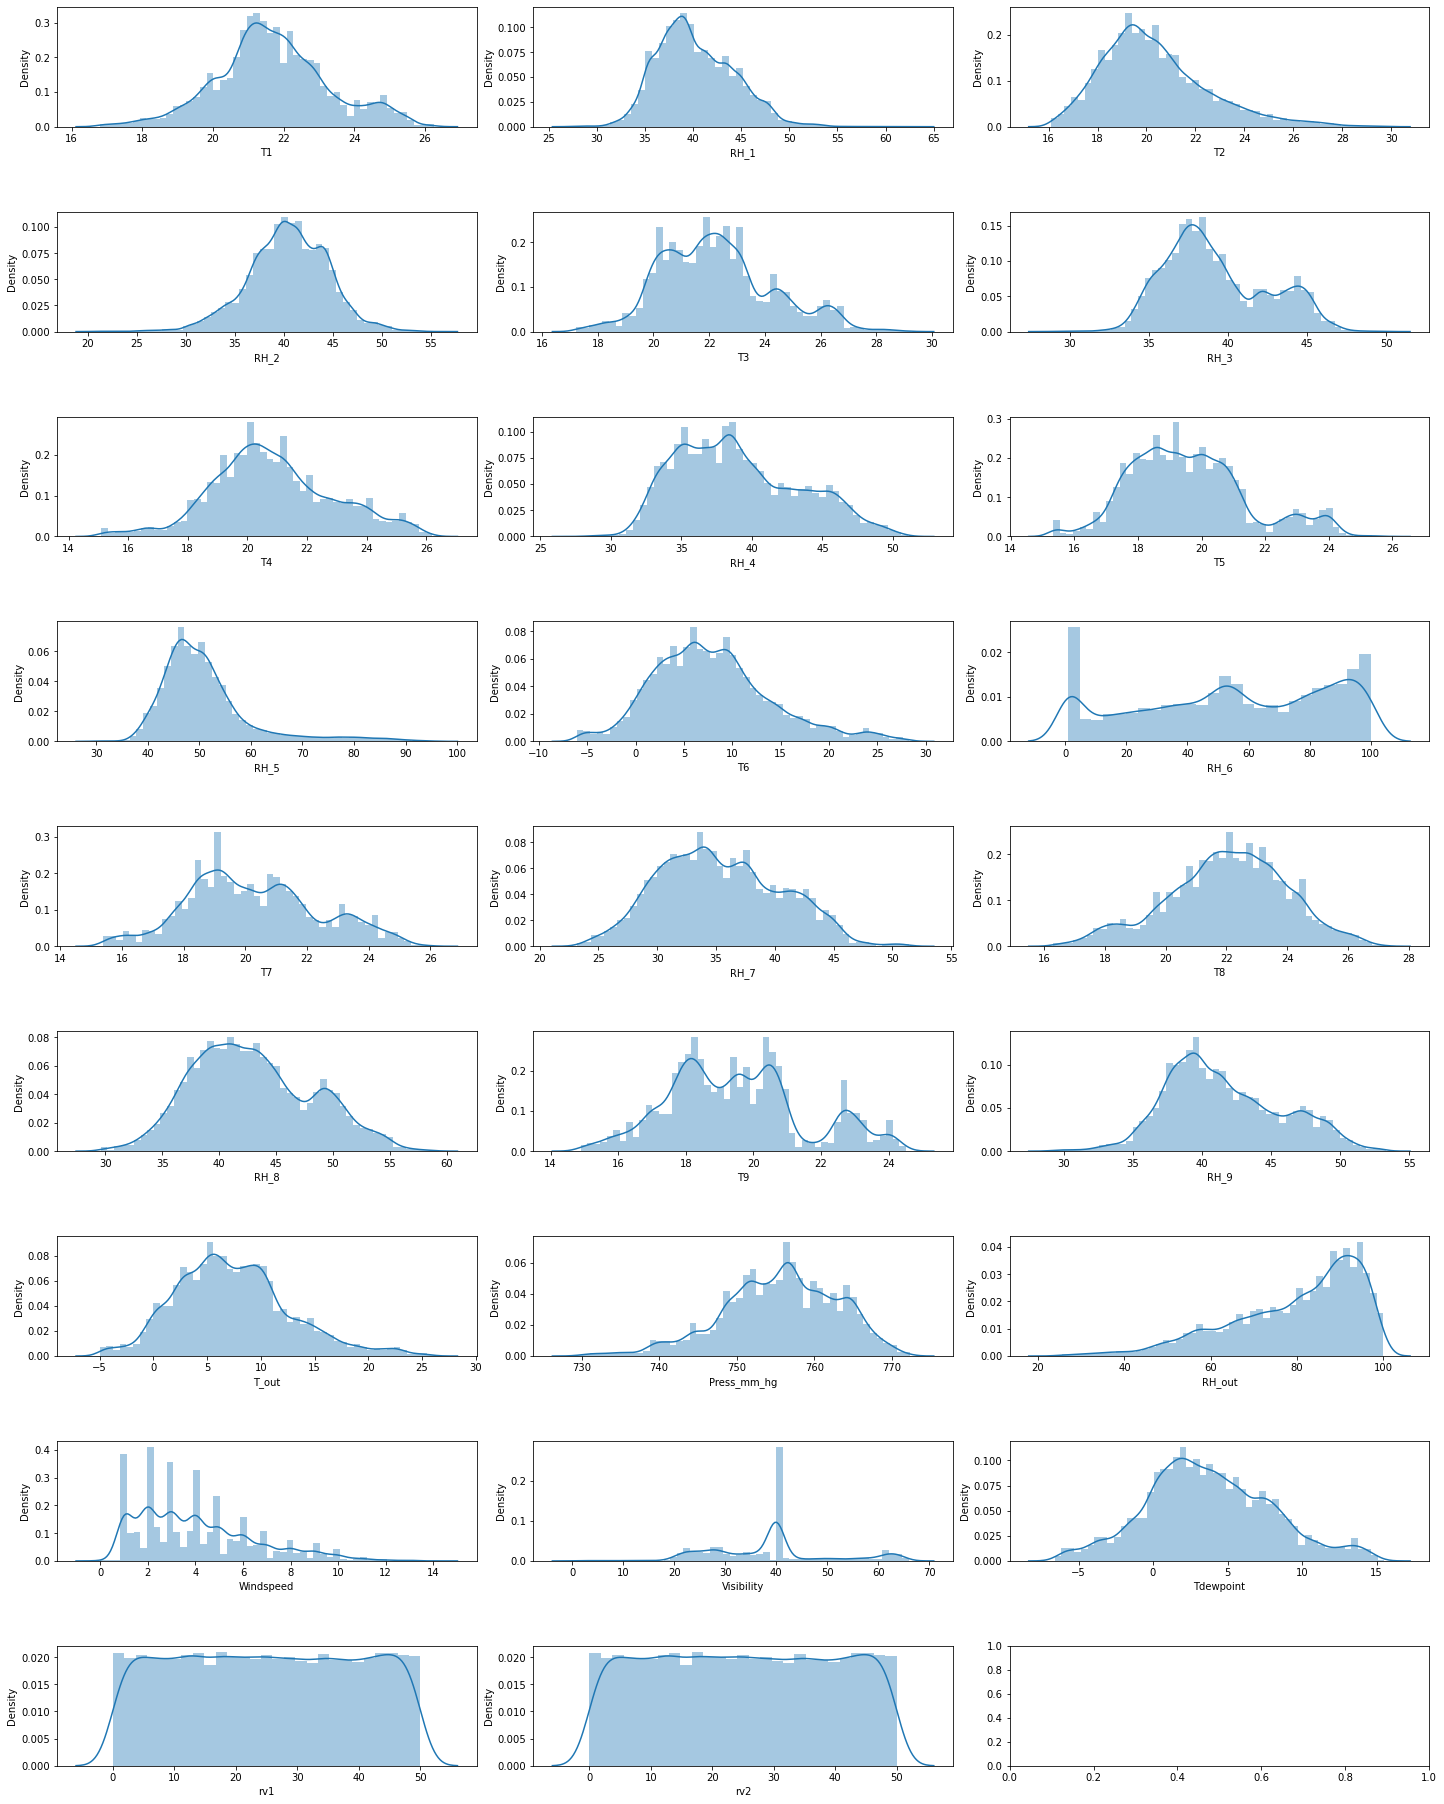

In [17]:
fig, ax = plt.subplots(ncols = 3, nrows = 9, figsize = (20,25))
index = 0
ax = ax.flatten()

for col, value in data.drop(columns=['date','Appliances','lights','year','month']).items():
    if col != 'type':
        sns.distplot(value, ax = ax[index])
        index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)

<AxesSubplot:xlabel='Appliances', ylabel='count'>

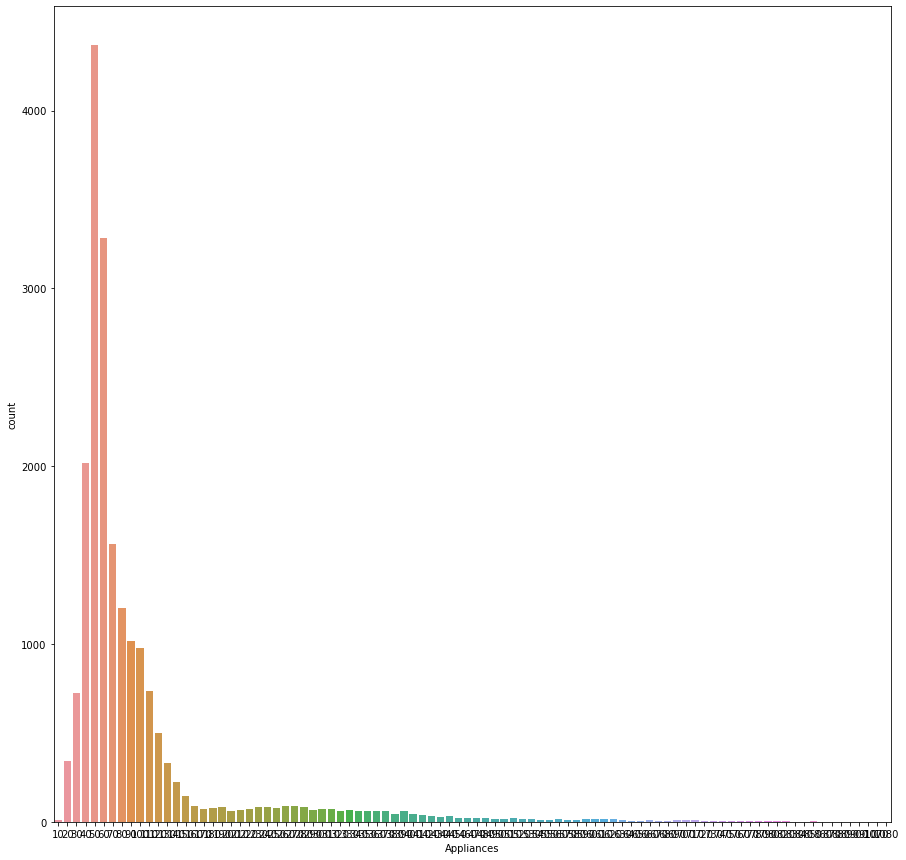

In [14]:
plt.figure(figsize=(15,15))
sns.countplot(data['Appliances'])

# Bivariate Analysis:

In [15]:
data.drop(columns=['date'],inplace=True)

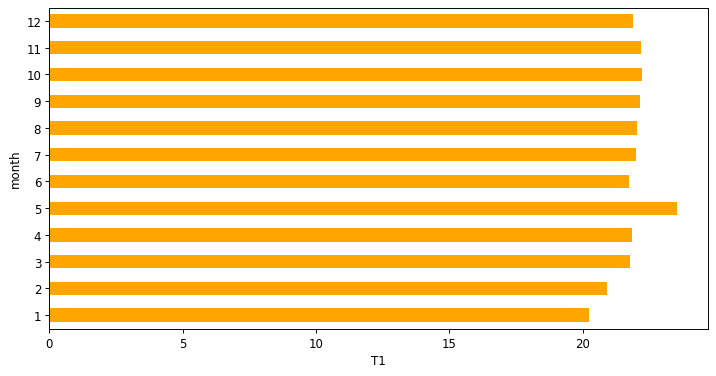

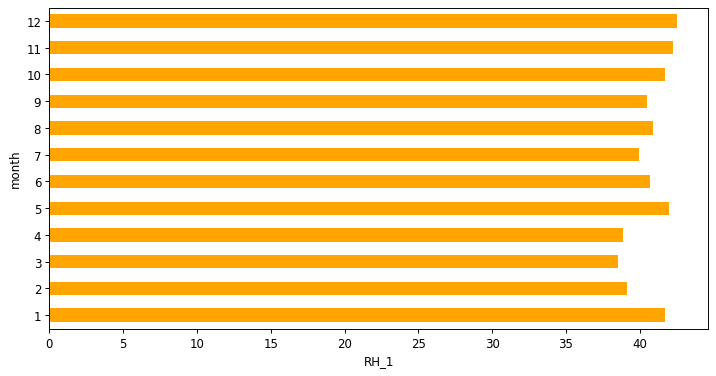

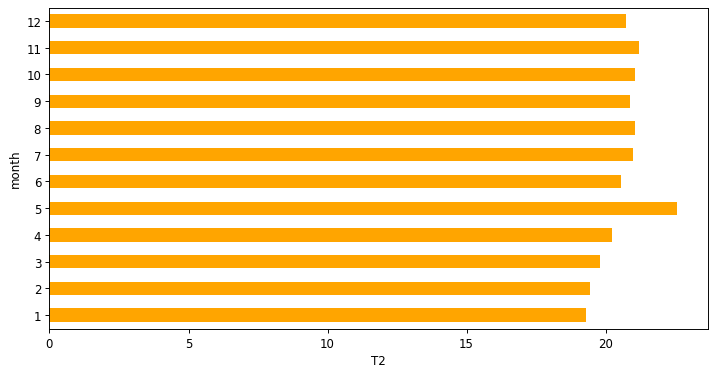

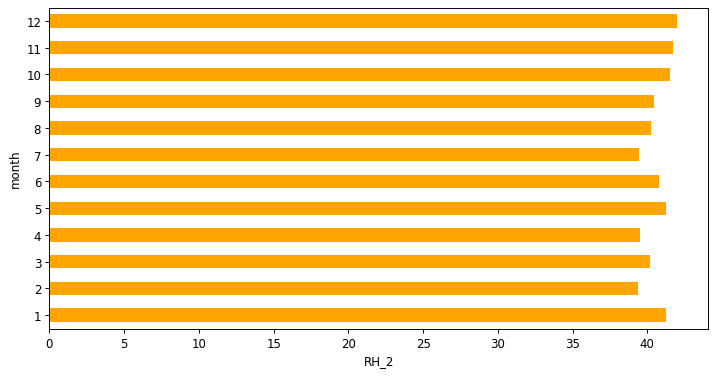

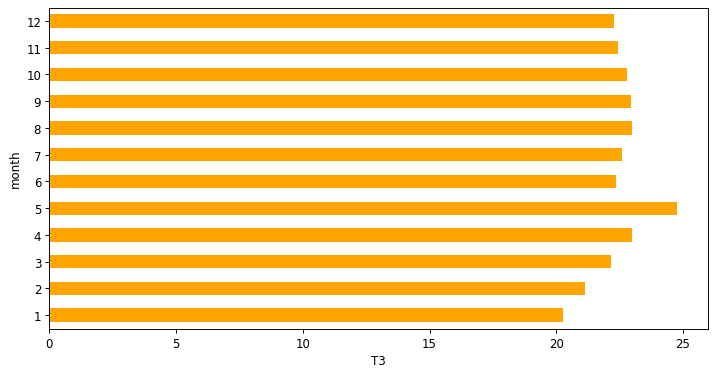

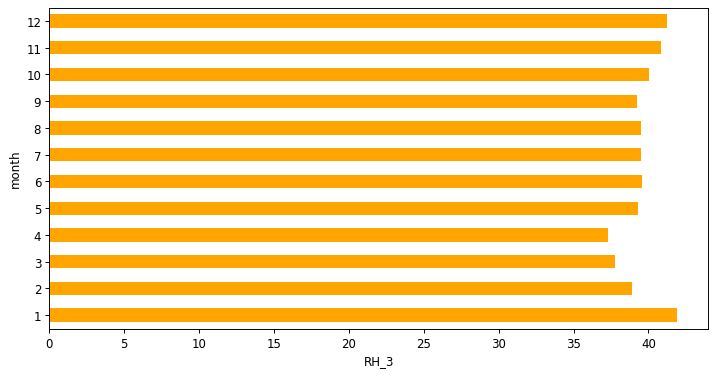

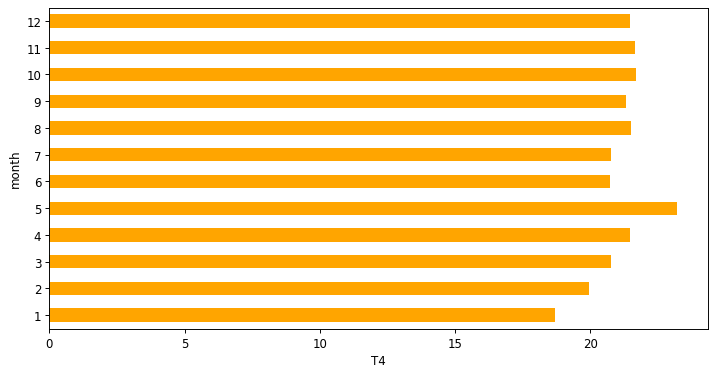

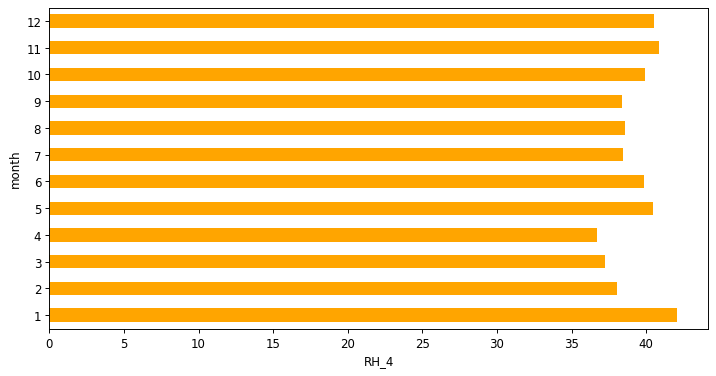

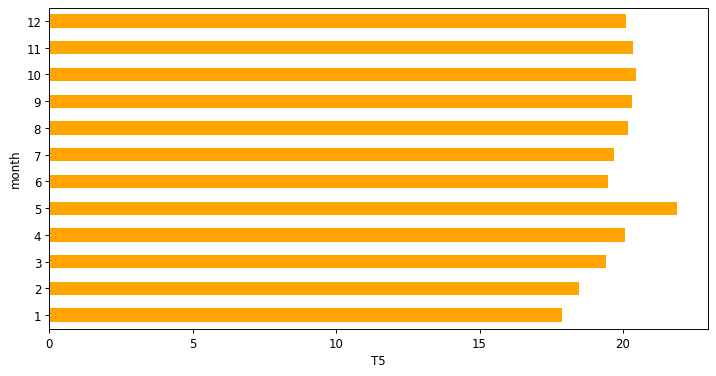

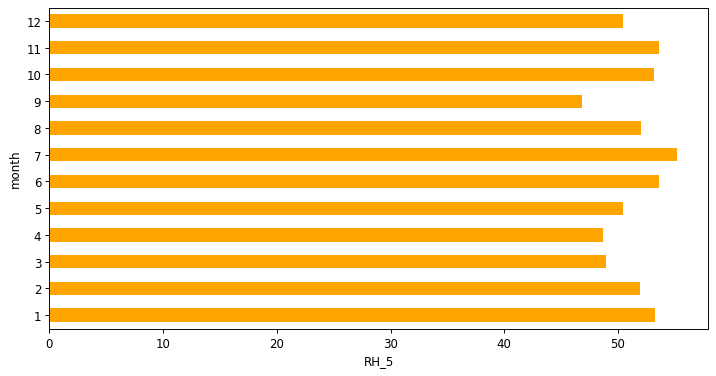

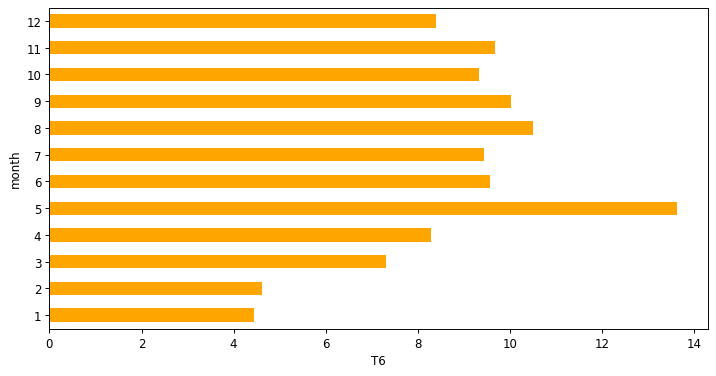

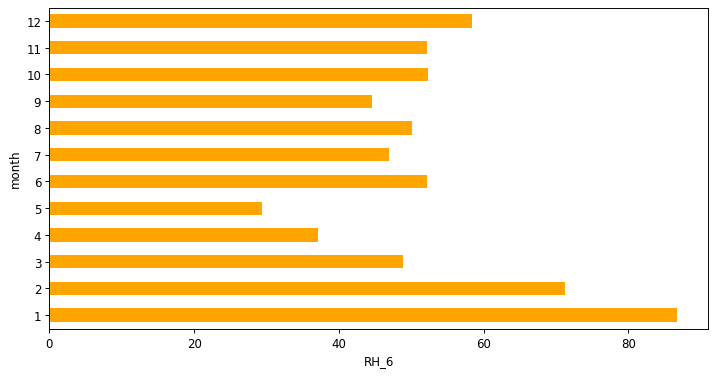

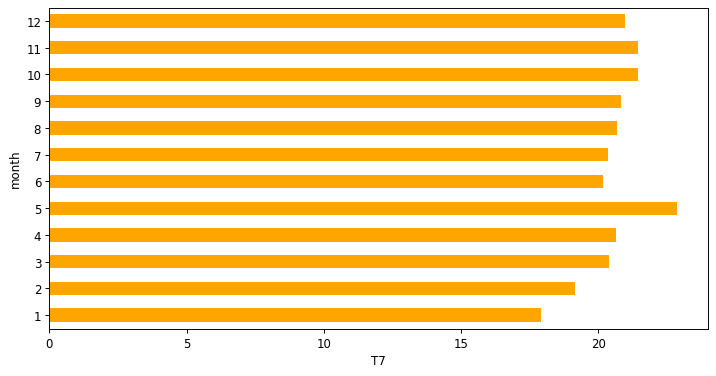

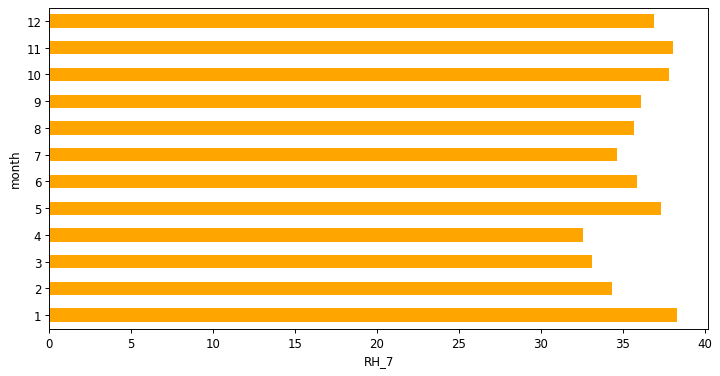

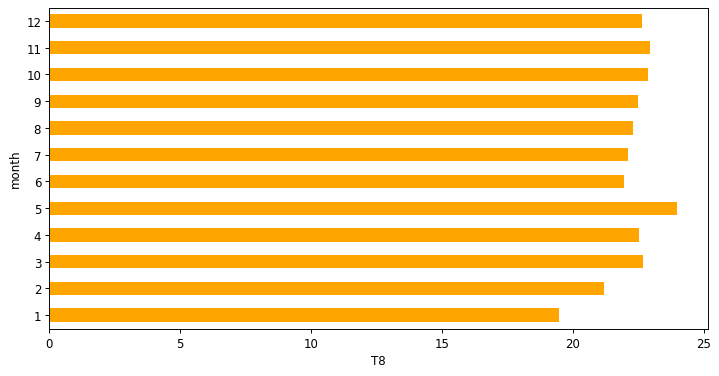

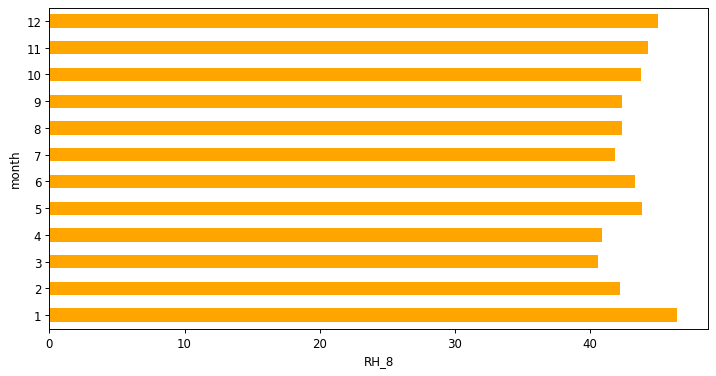

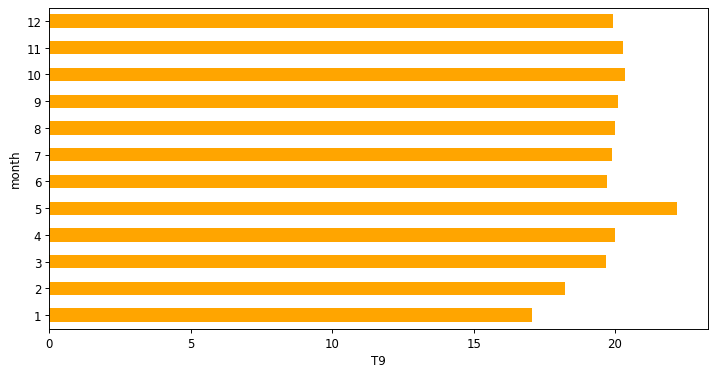

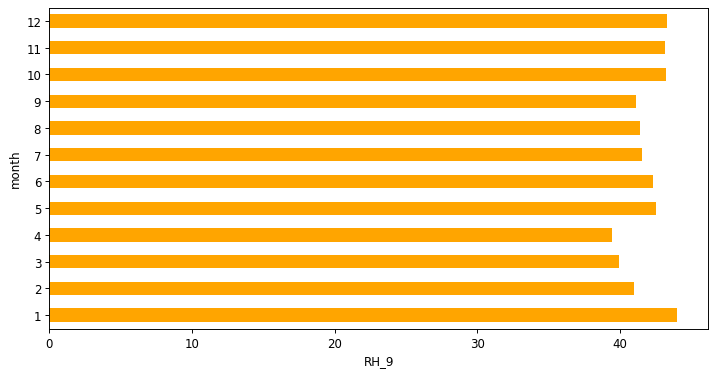

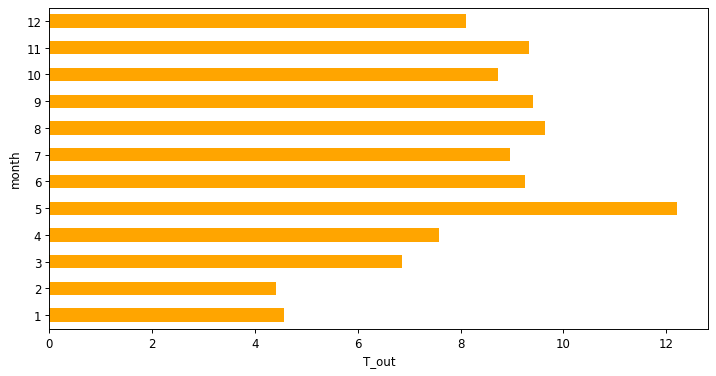

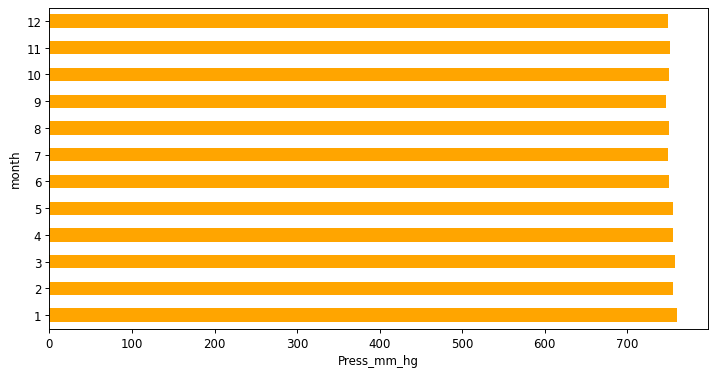

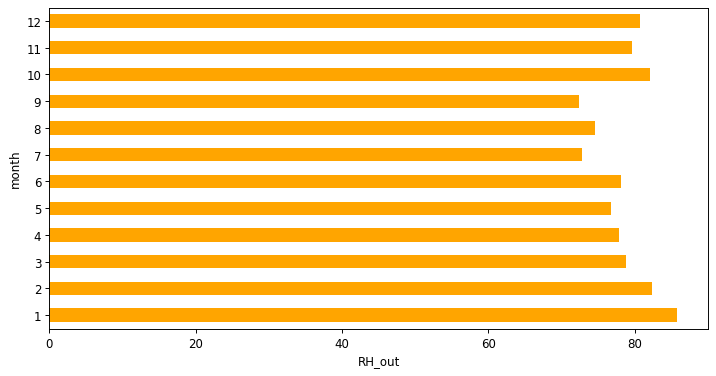

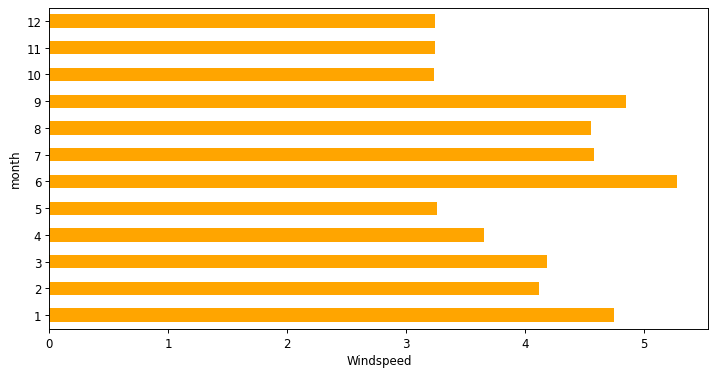

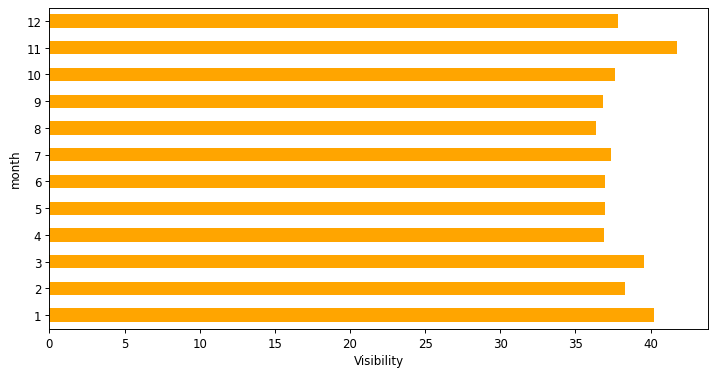

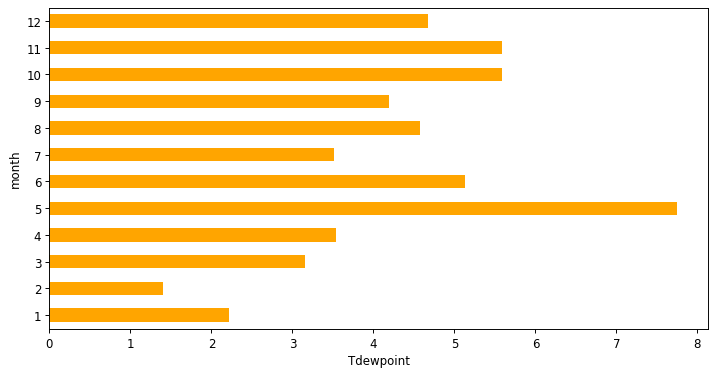

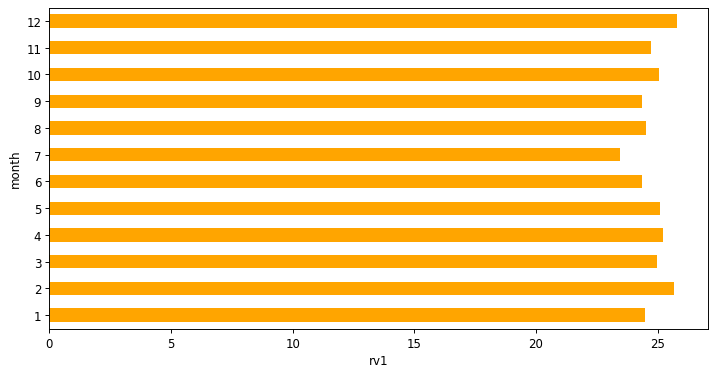

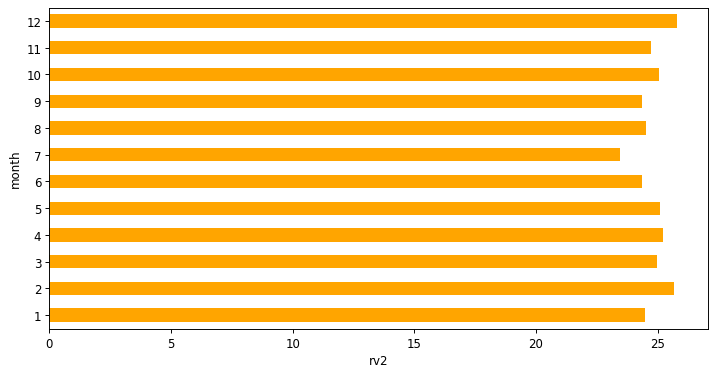

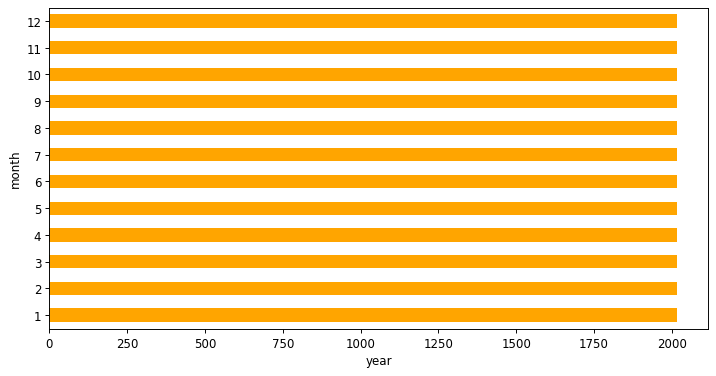

In [16]:
for i in data.drop(columns=['lights','Appliances','month']).columns:
    plt.figure(figsize=[10,5],dpi=85)
    data.groupby('month')[i].mean().plot(kind='barh',color='orange')
    plt.xlabel(i)

month
1      96.911232
2      92.791005
3      98.765097
4     102.086490
5     103.072936
6      90.312500
7      96.996528
8     106.284722
9     100.711806
10     82.361111
11     86.003236
12     96.958333
Name: Appliances, dtype: float64

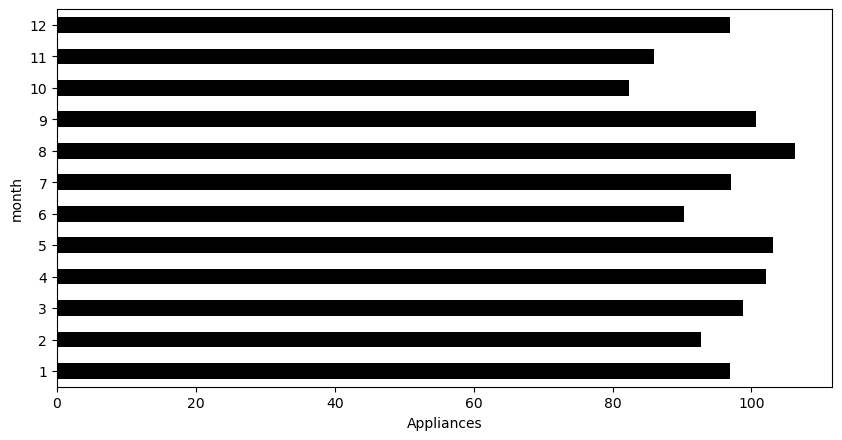

In [17]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('month')['Appliances'].mean().plot(kind='barh',color='black')
plt.xlabel('Appliances')
data.groupby('month')['Appliances'].mean()

* In august little bit more energy consume appliances

In [18]:
data['Appliances'].value_counts()

50      4368
60      3282
40      2019
70      1560
80      1205
        ... 
890        1
1070       1
910        1
1080       1
840        1
Name: Appliances, Length: 92, dtype: int64

In [19]:
def unique(value):
    if value>=100:
        return 'High energy'
    else:
        return 'Low energy'

In [20]:
data['Appliances']=data['Appliances'].apply(unique)


In [21]:
data['Appliances'].value_counts()

Low energy     14524
High energy     5211
Name: Appliances, dtype: int64

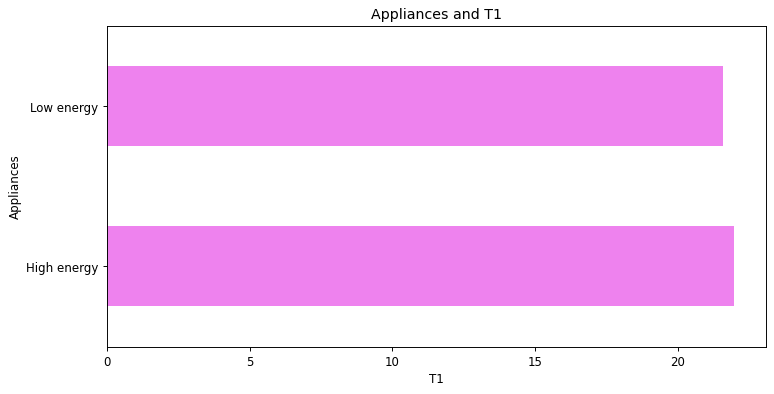

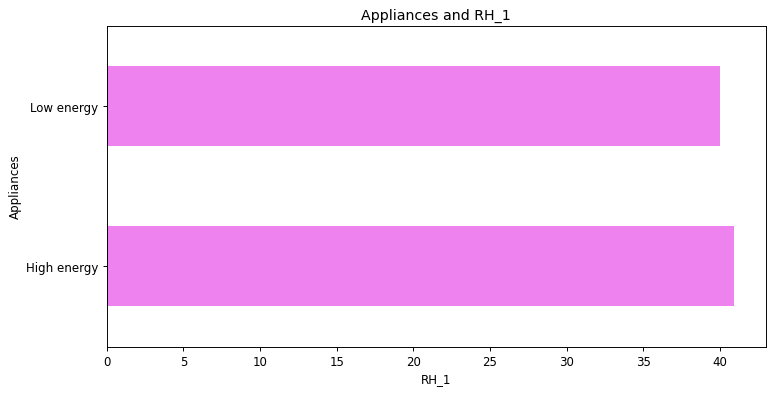

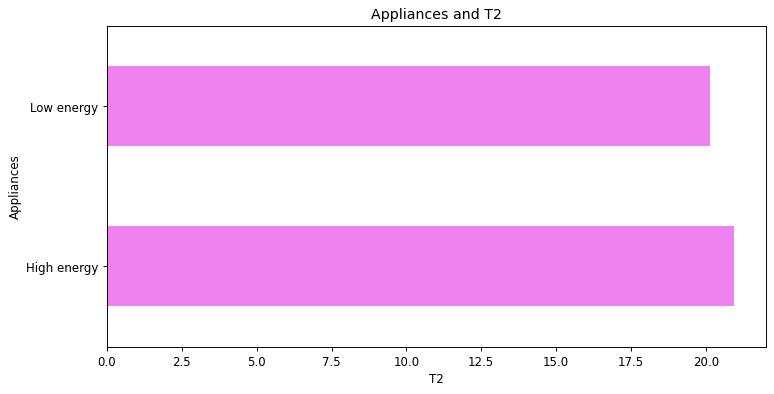

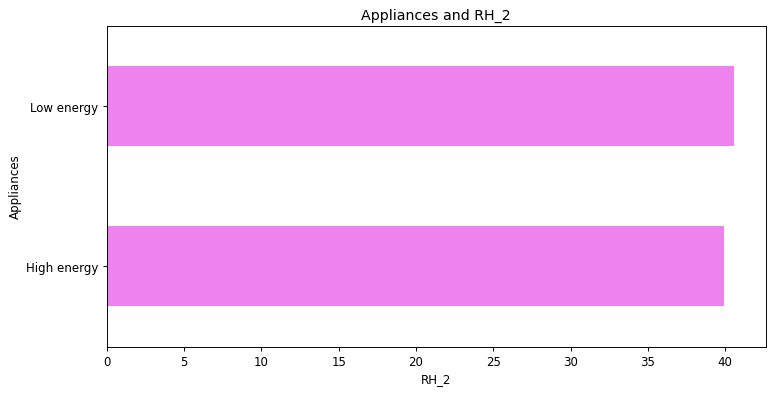

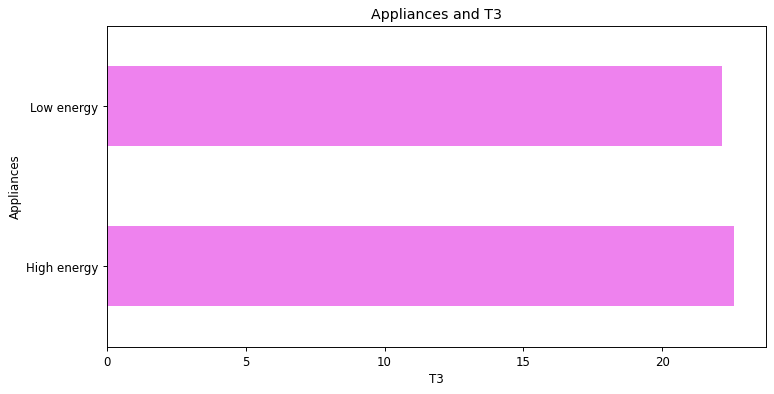

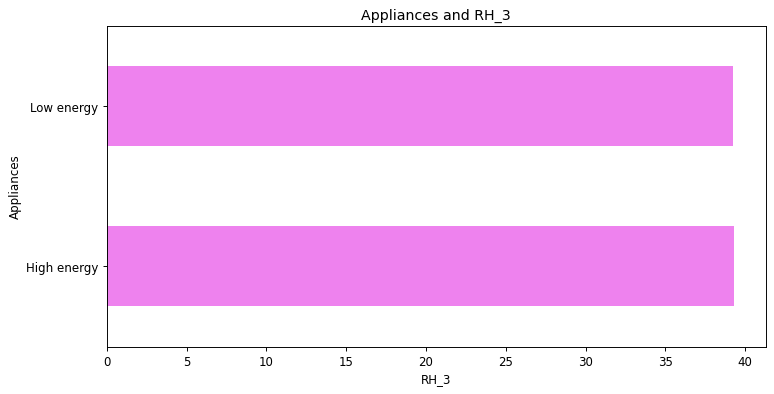

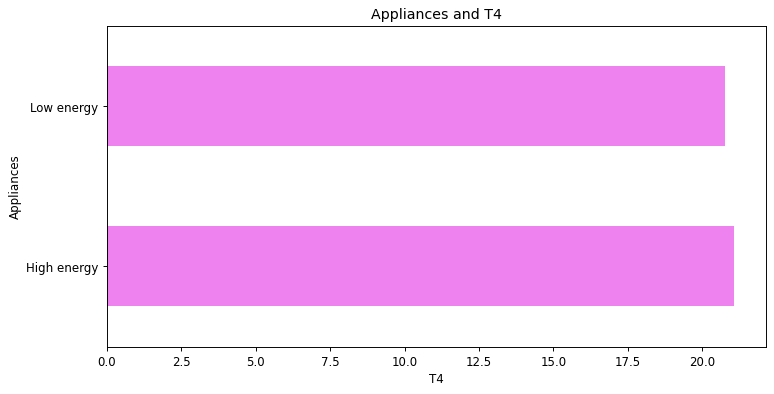

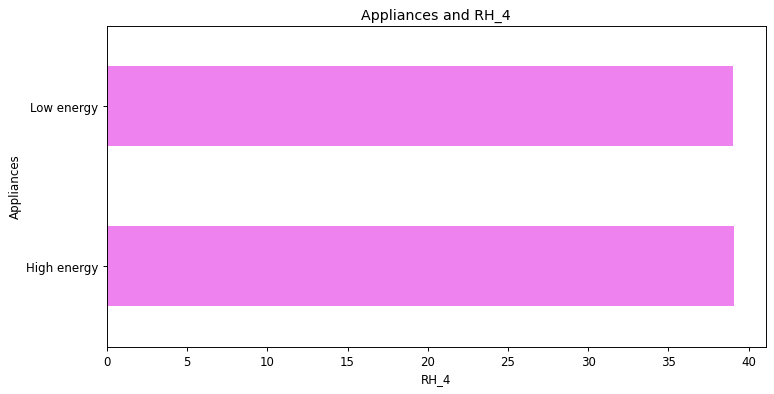

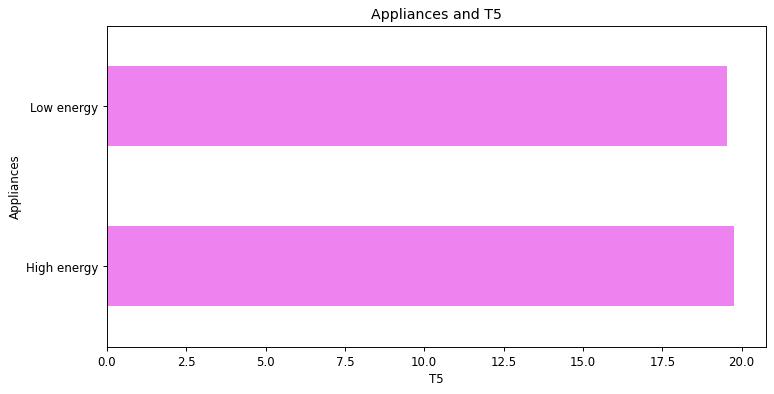

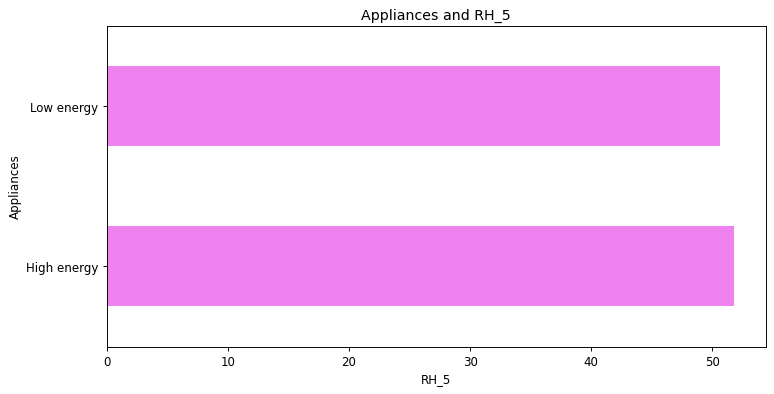

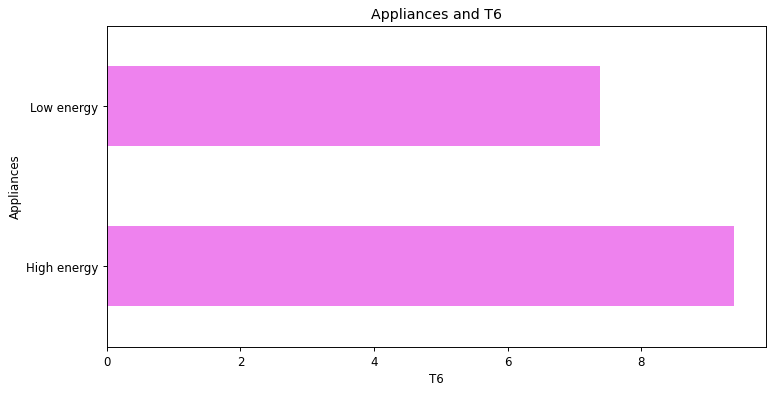

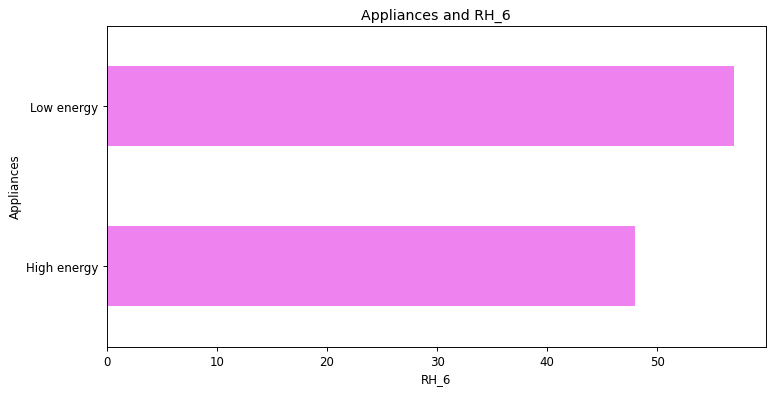

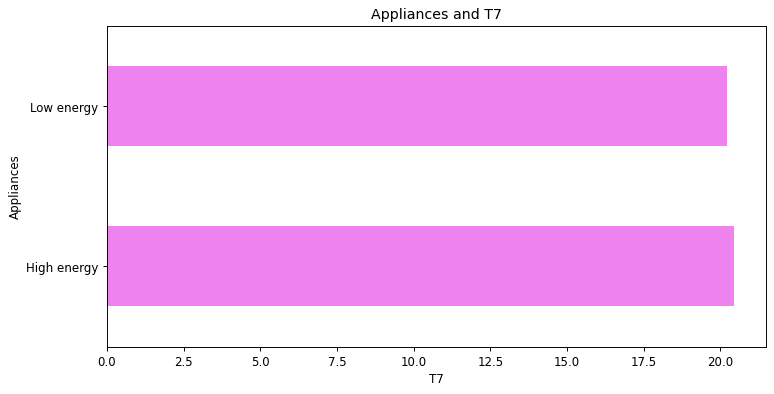

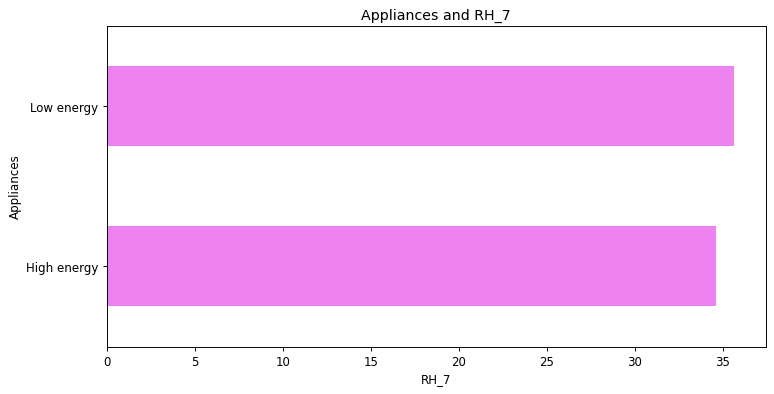

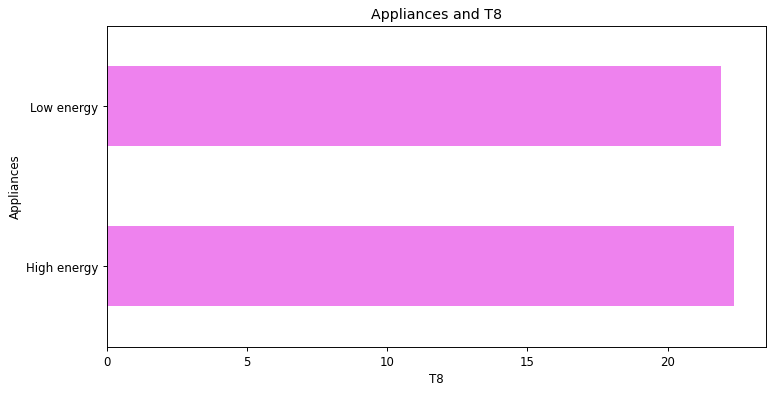

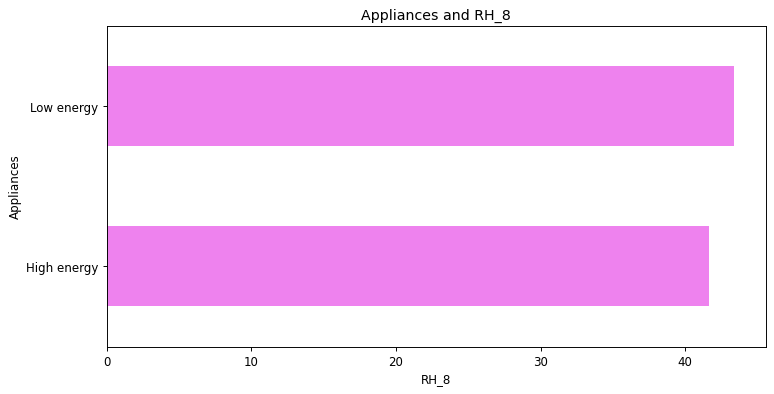

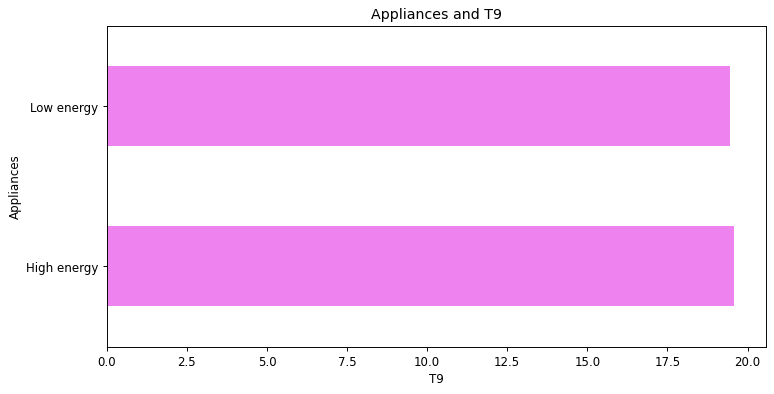

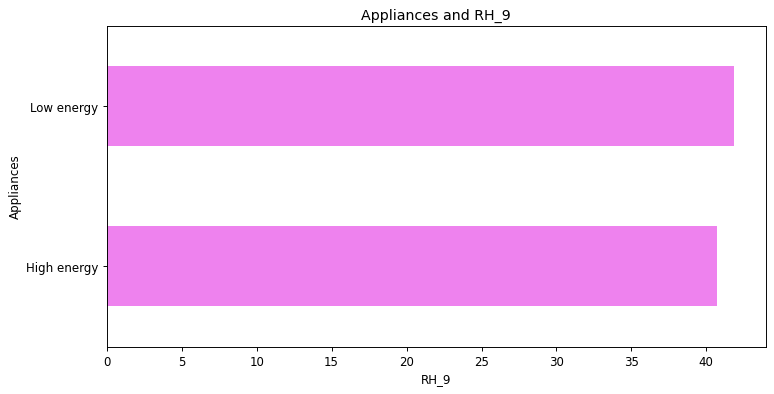

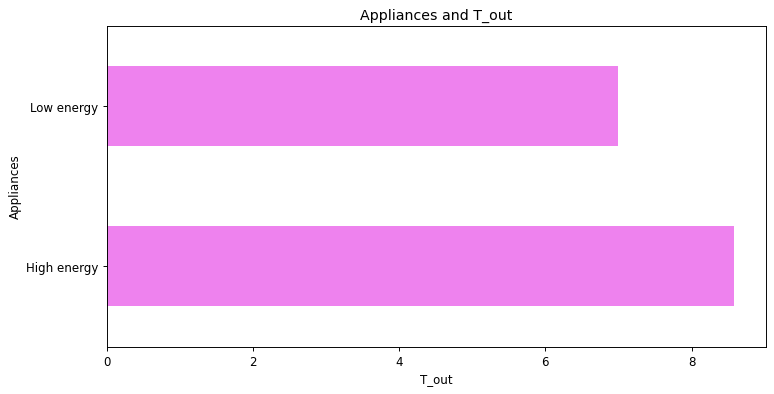

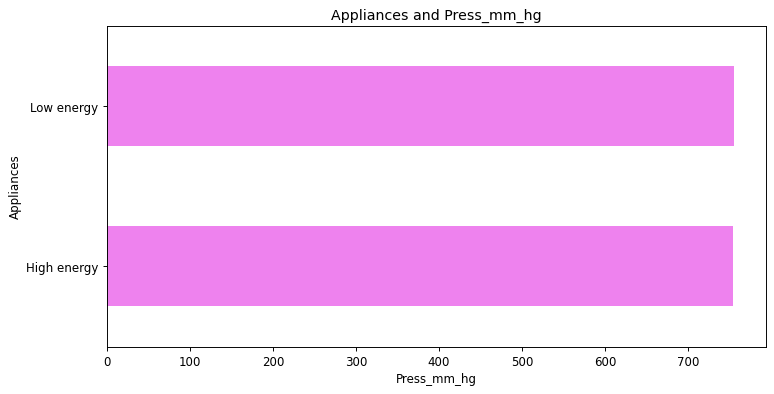

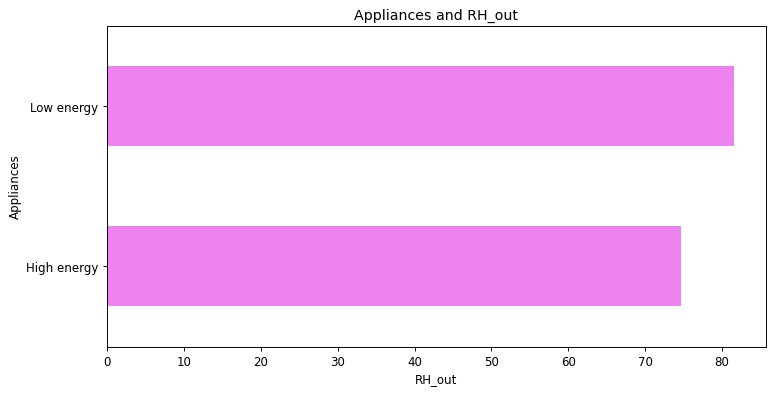

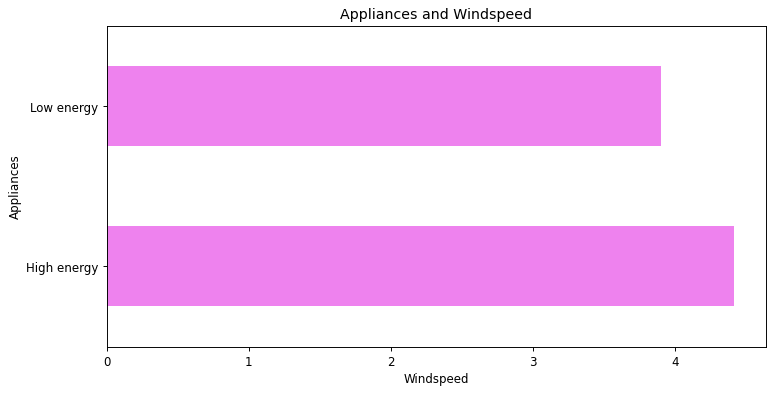

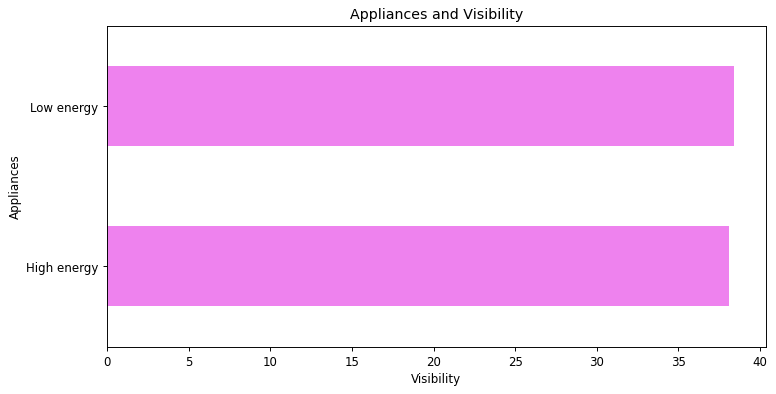

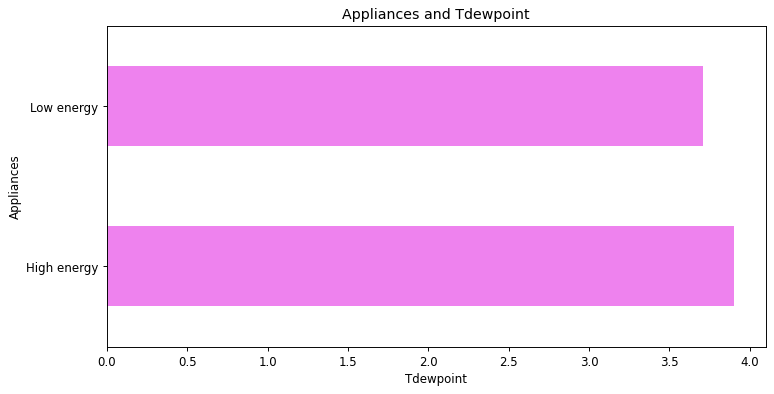

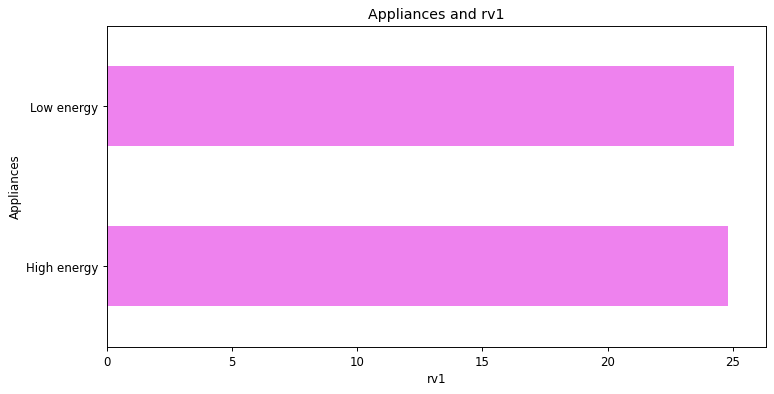

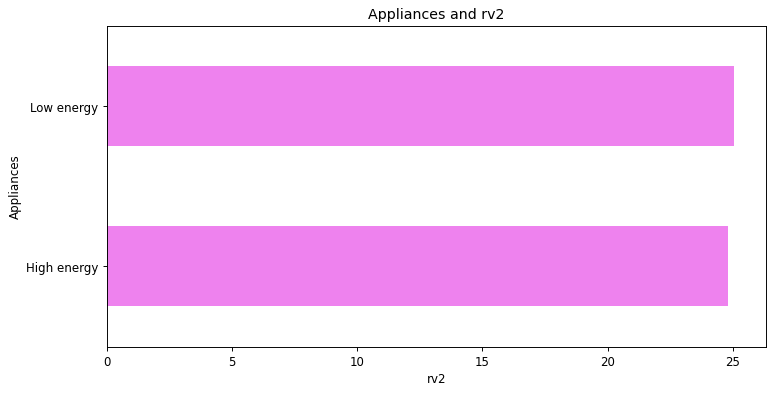

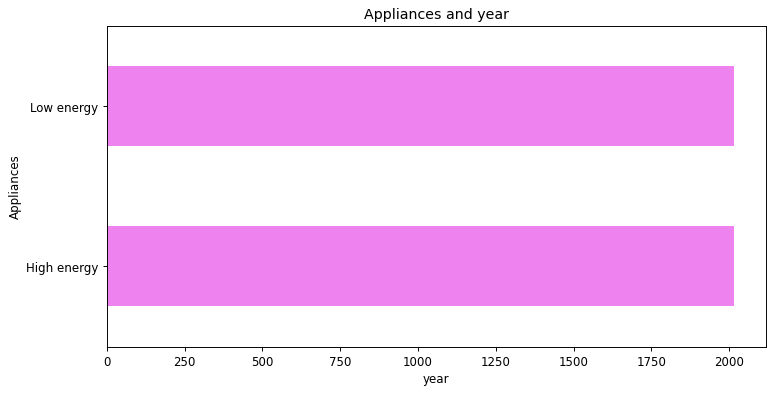

In [22]:
for i in data.drop(columns=['lights','Appliances','month']).columns:
    plt.figure(figsize=[10,5],dpi=85)
    data.groupby('Appliances')[i].mean().plot(kind='barh',color='violet')
    plt.xlabel(i)
    plt.title('Appliances and {}'.format(i))

### Multivariate Analysis:

<AxesSubplot:xlabel='T1', ylabel='T2'>

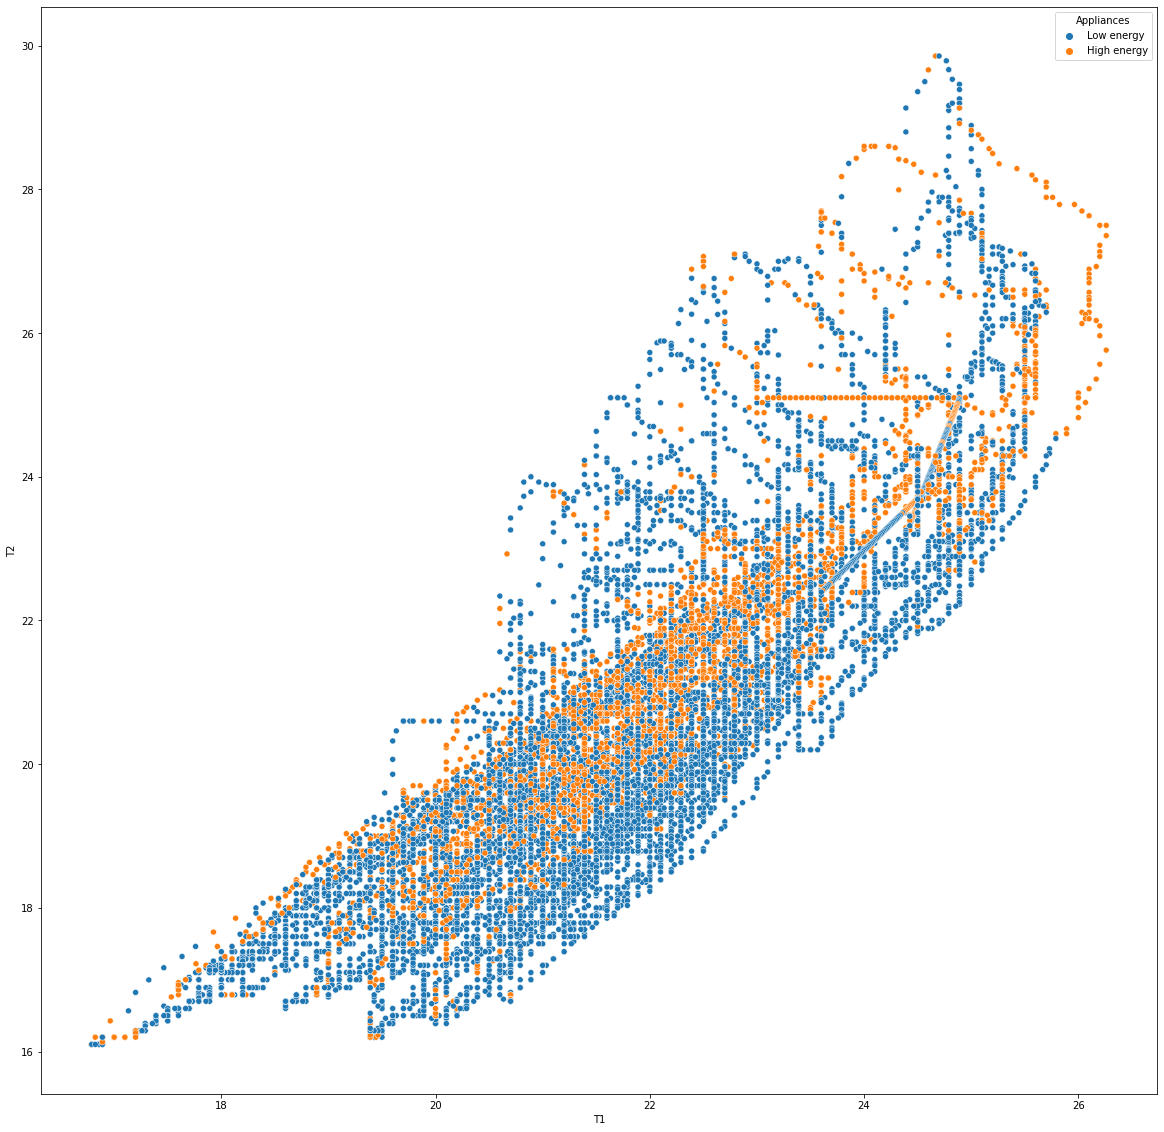

In [23]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='T1',y='T2',hue='Appliances',data=data)

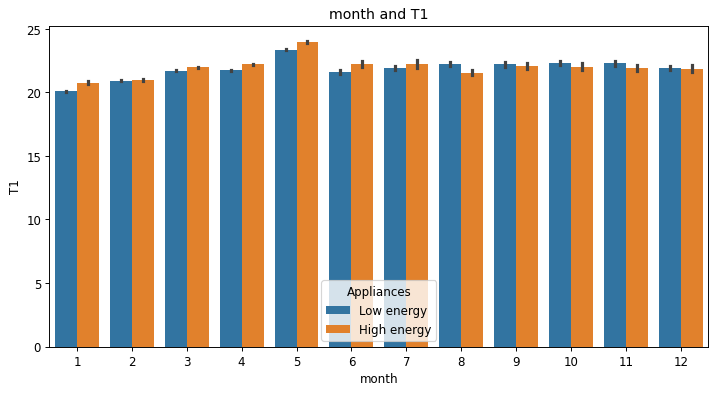

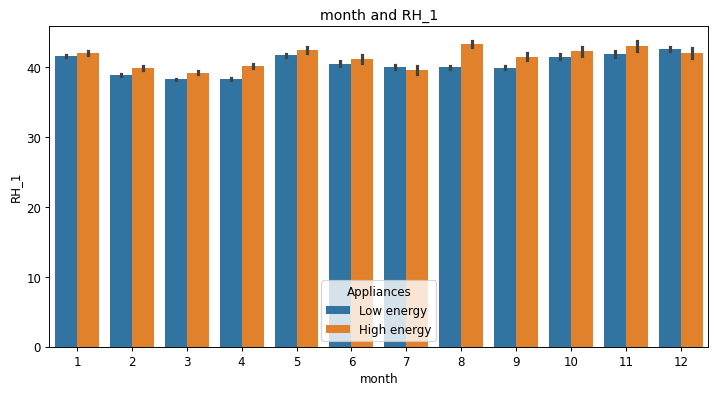

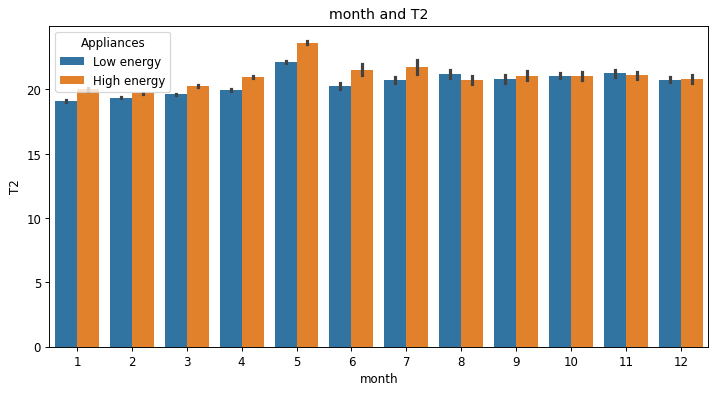

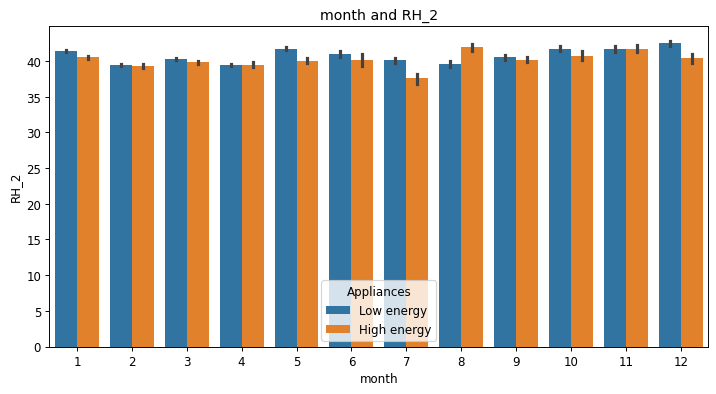

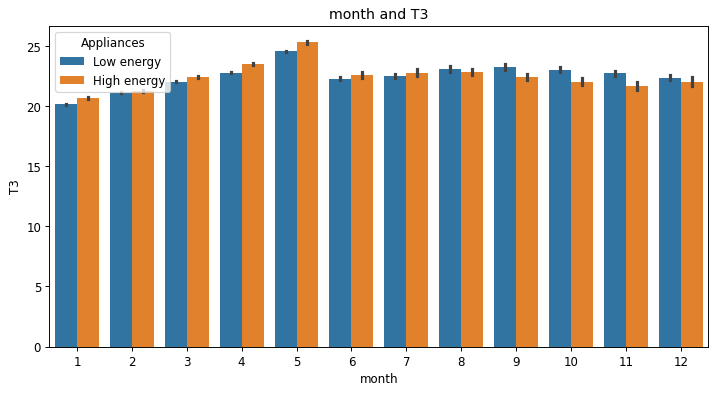

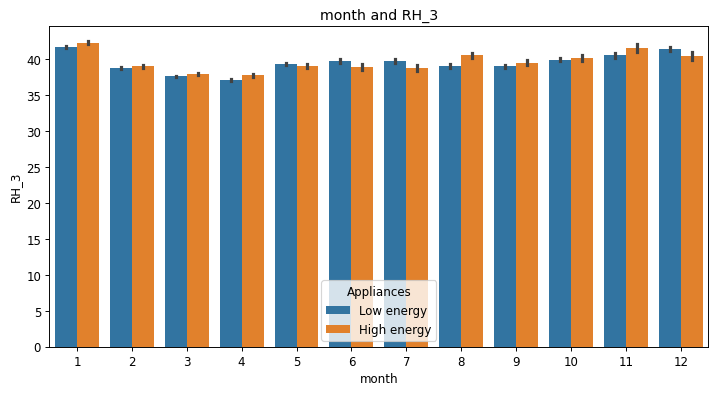

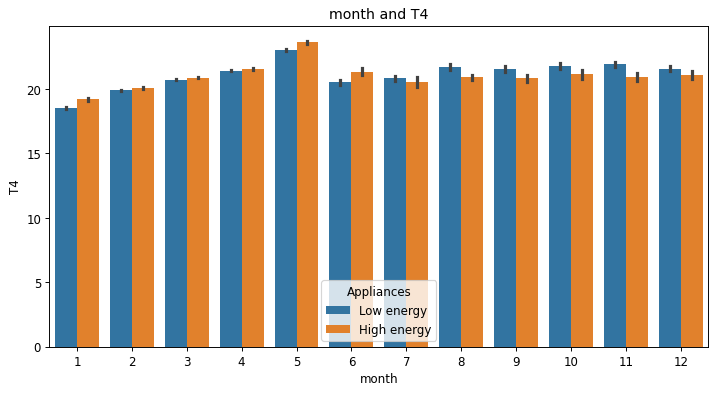

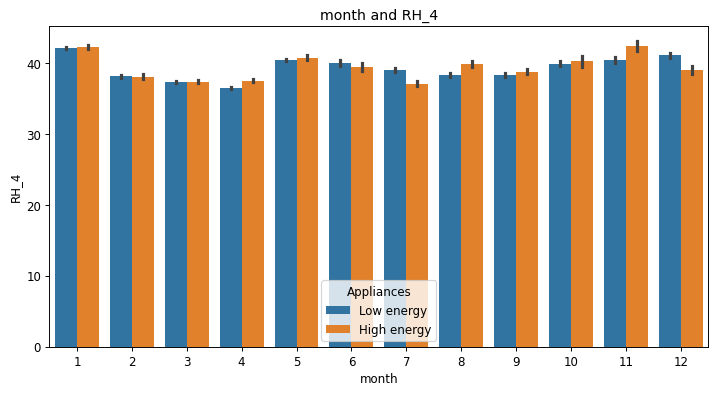

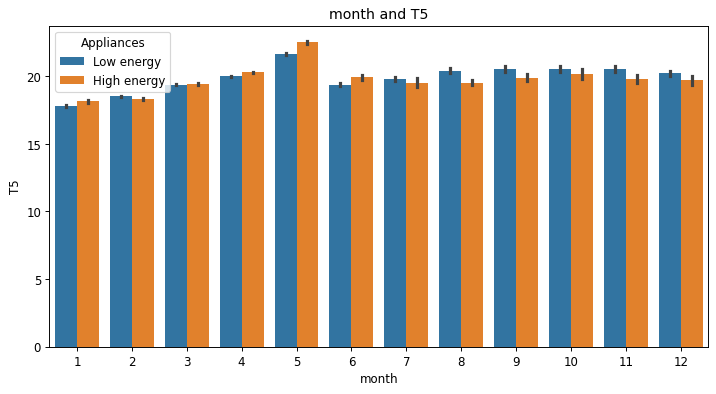

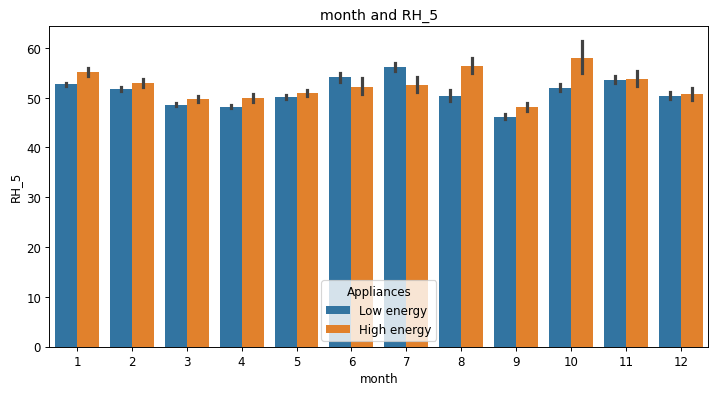

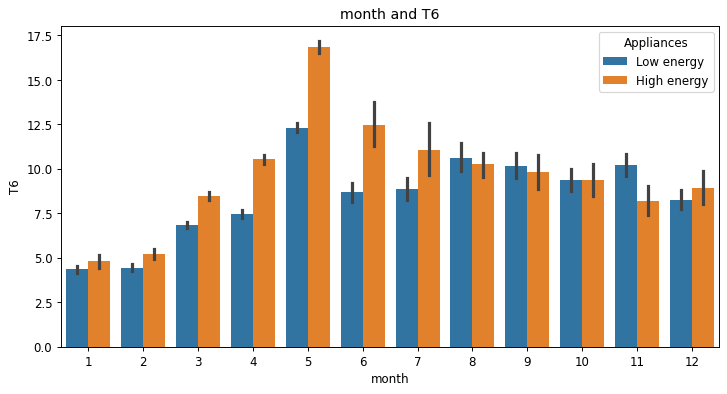

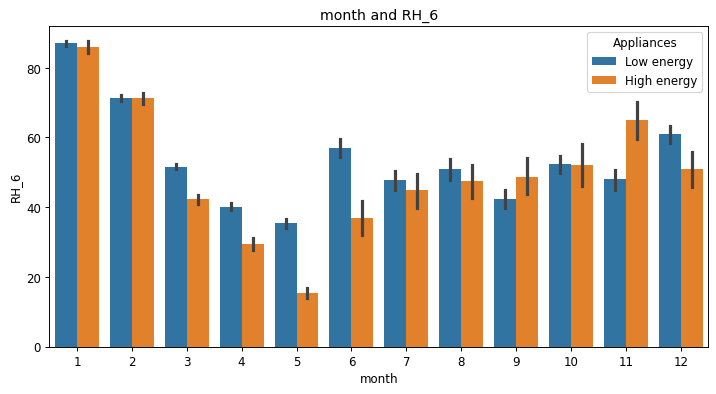

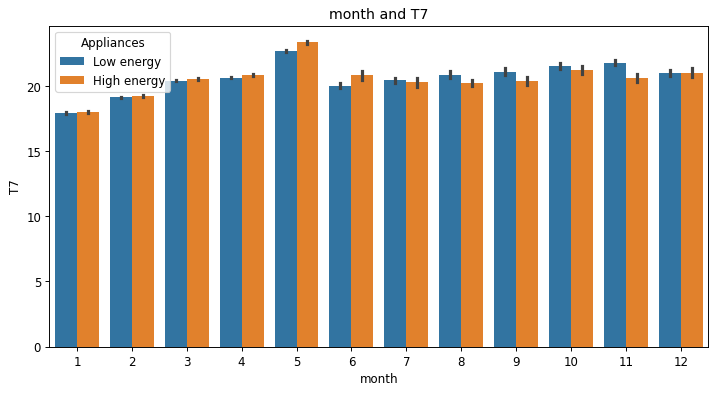

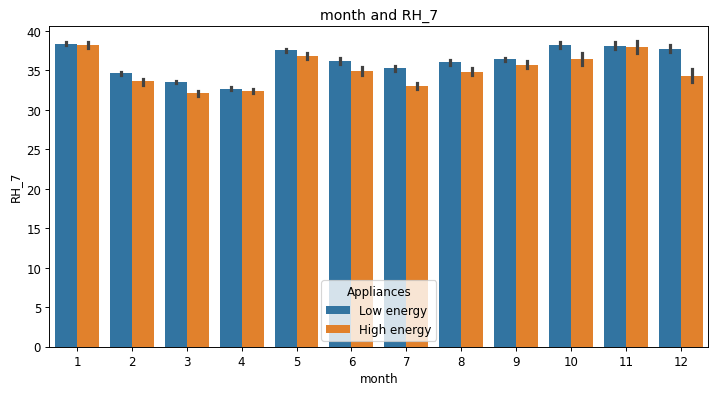

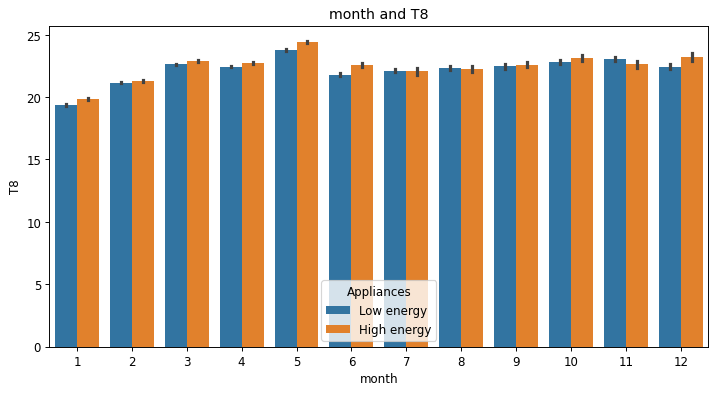

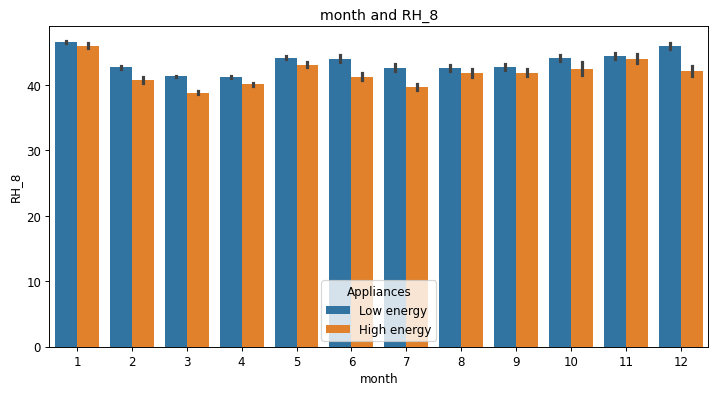

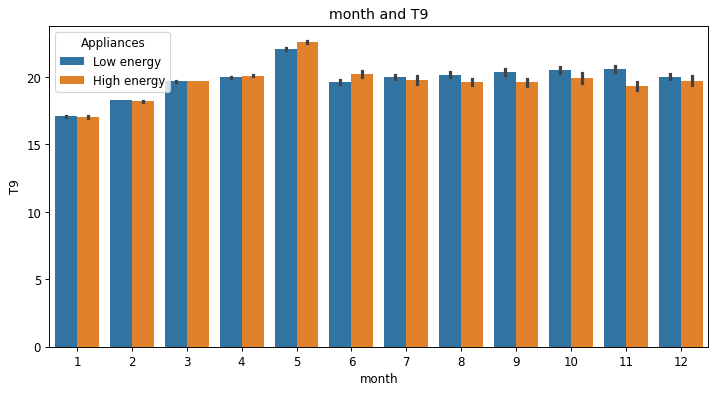

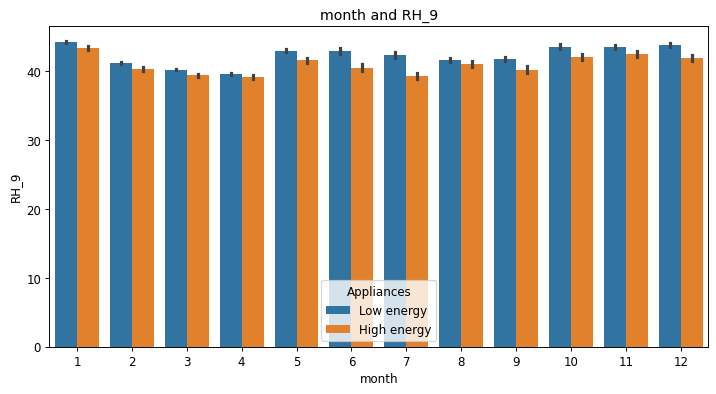

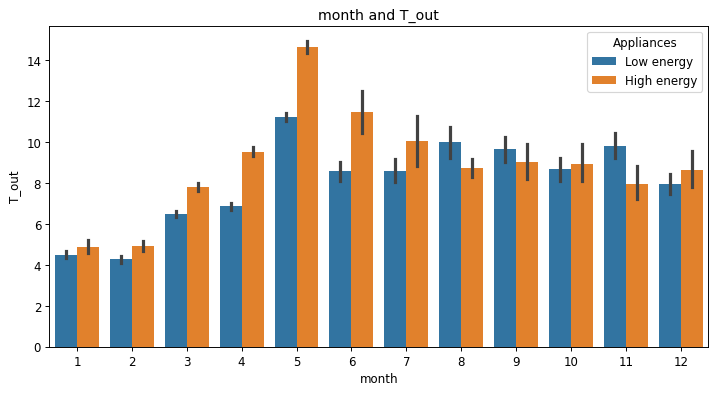

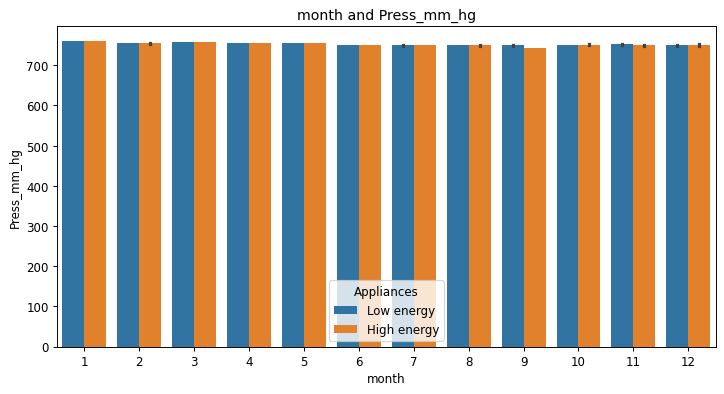

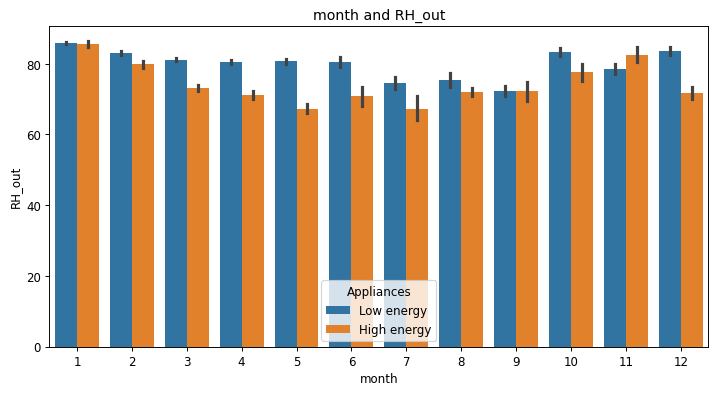

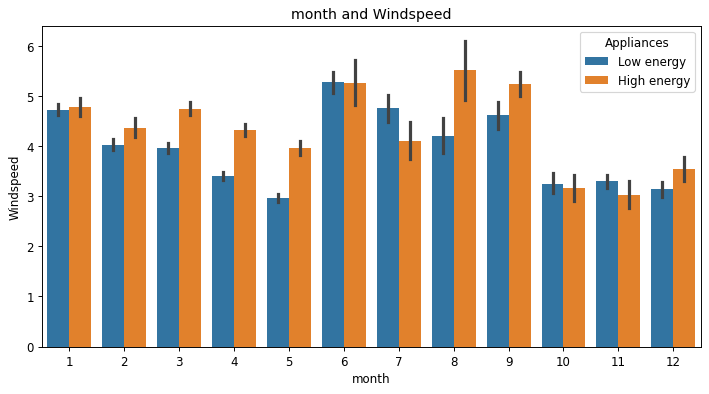

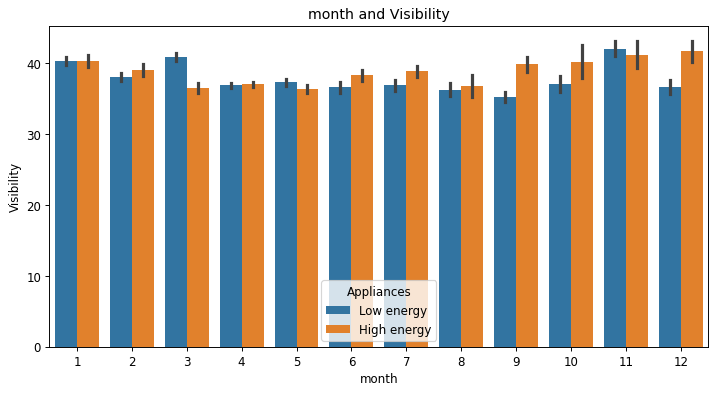

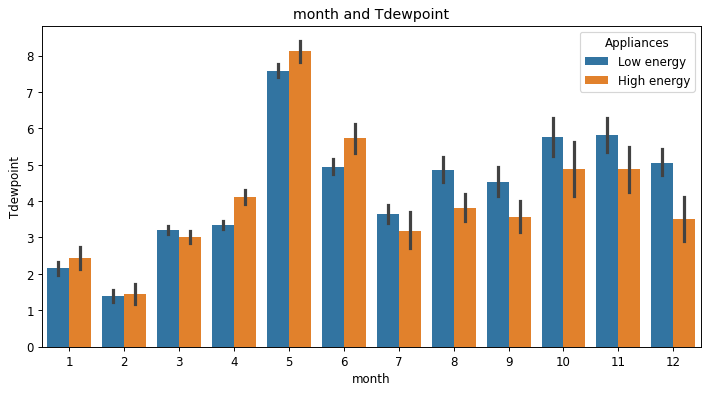

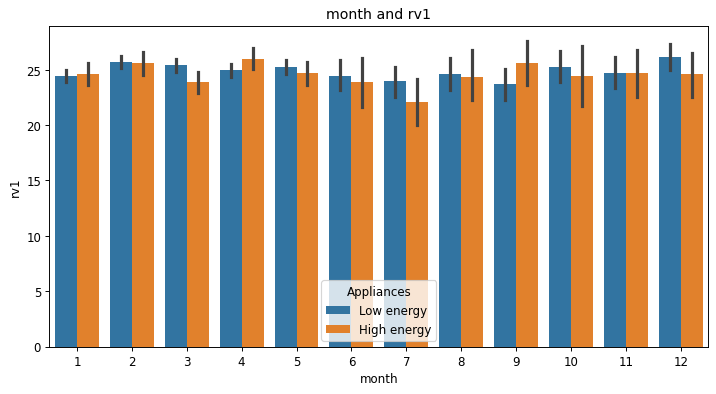

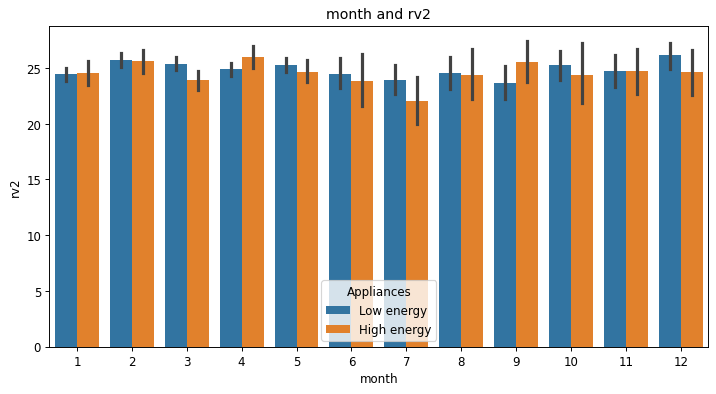

In [24]:
for i in data.drop(columns=['lights','Appliances','year','month']).columns:
    plt.figure(figsize=[10,5],dpi=85)
    sns.barplot(x='month',y=i,hue='Appliances',data=data)
    plt.title('month and {}'.format(i))

In [25]:
def unique(value):
    if value>=30:
        return 'more light'
    else:
        return 'less light'

In [26]:
data['lights']=data['lights'].apply(unique)

In [27]:
data['lights'].value_counts()

less light    19088
more light      647
Name: lights, dtype: int64

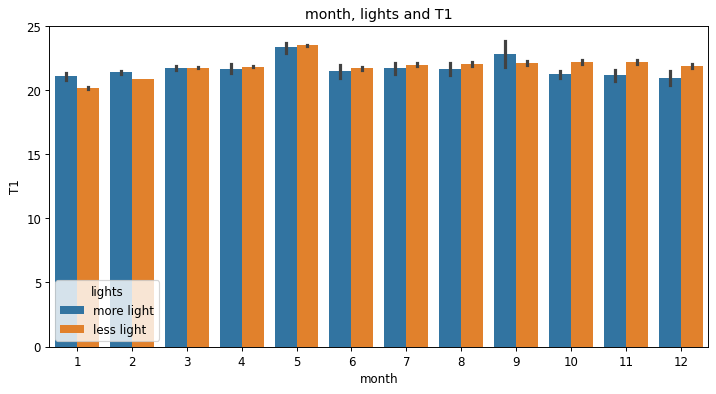

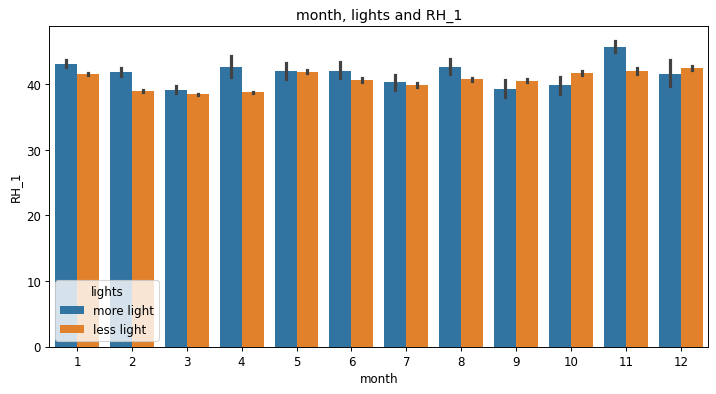

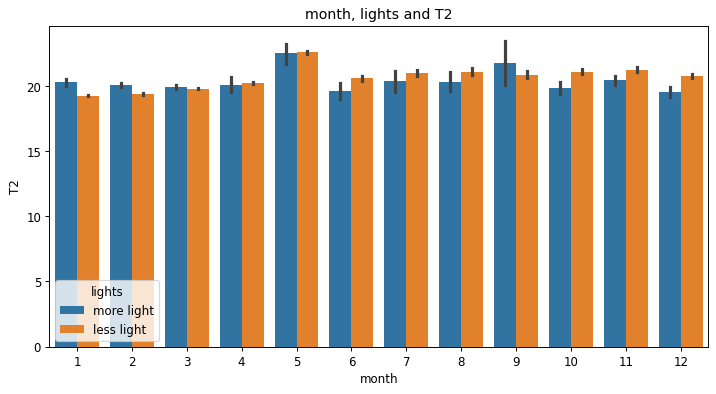

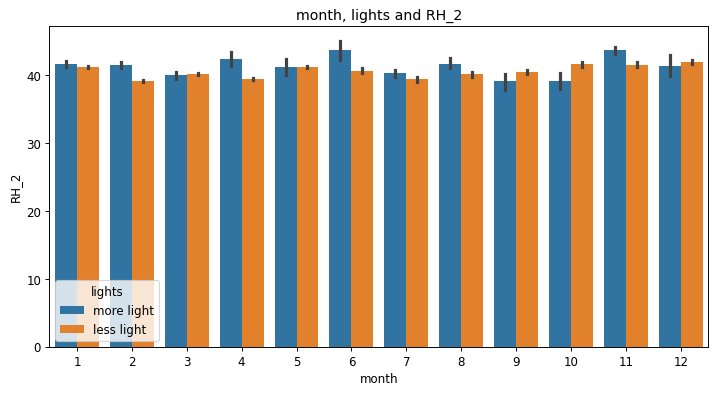

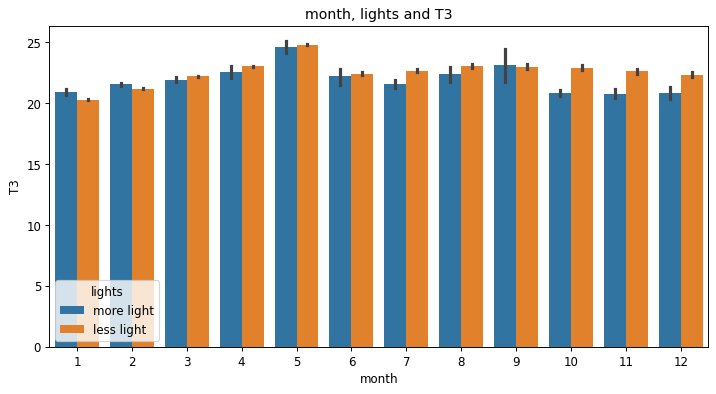

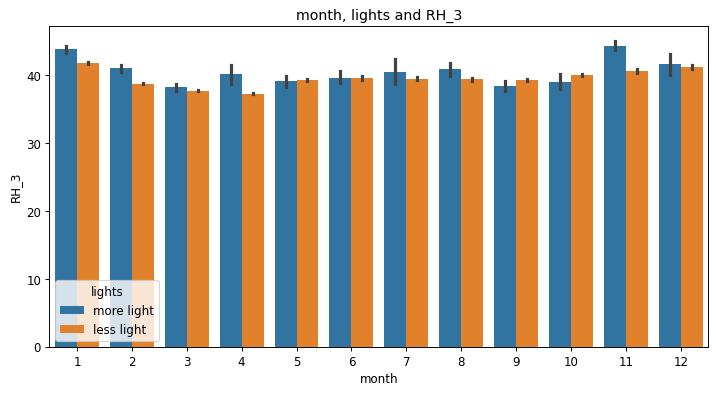

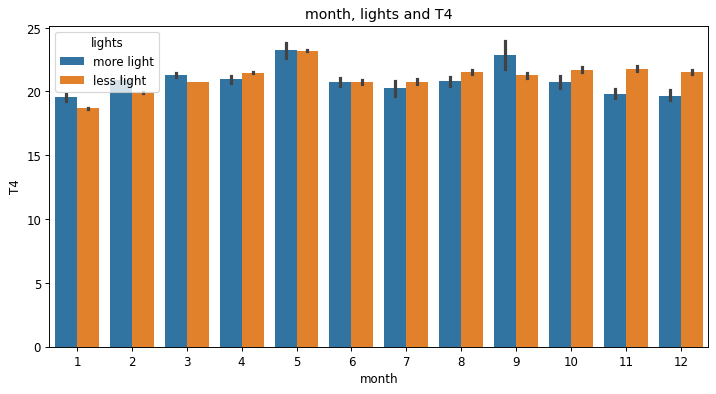

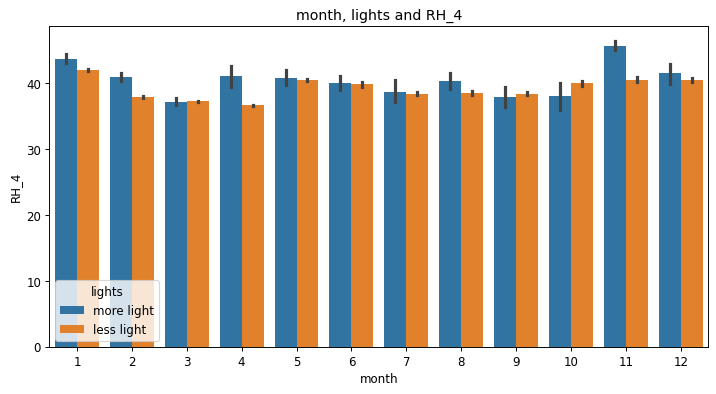

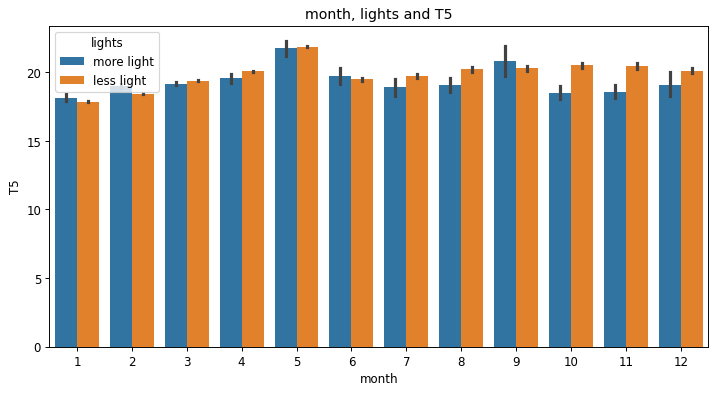

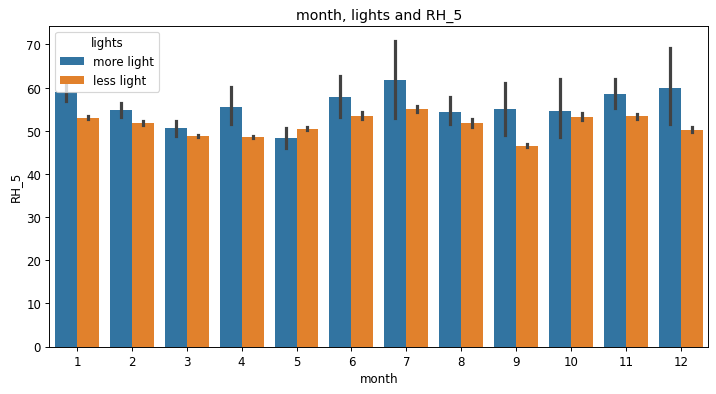

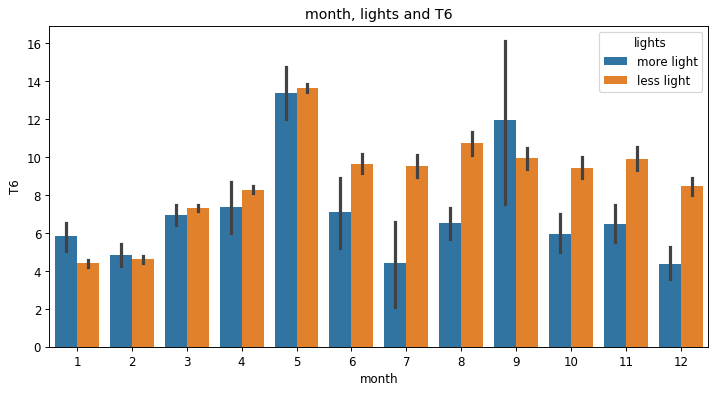

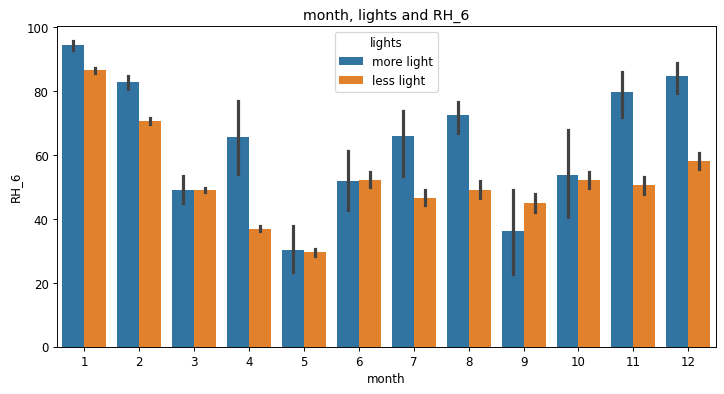

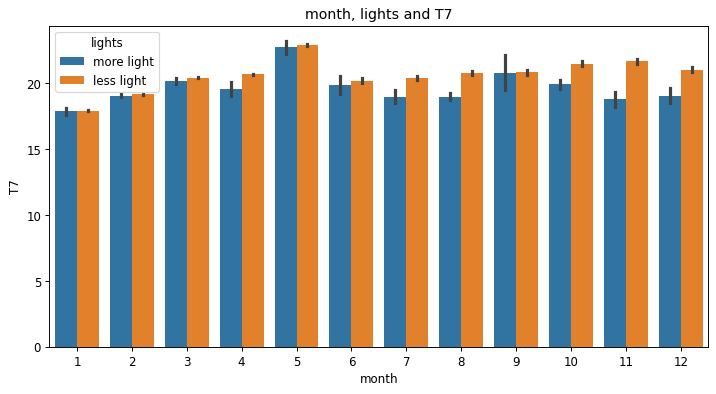

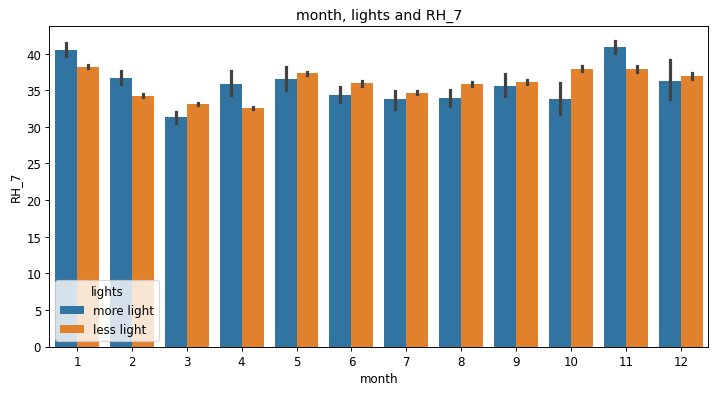

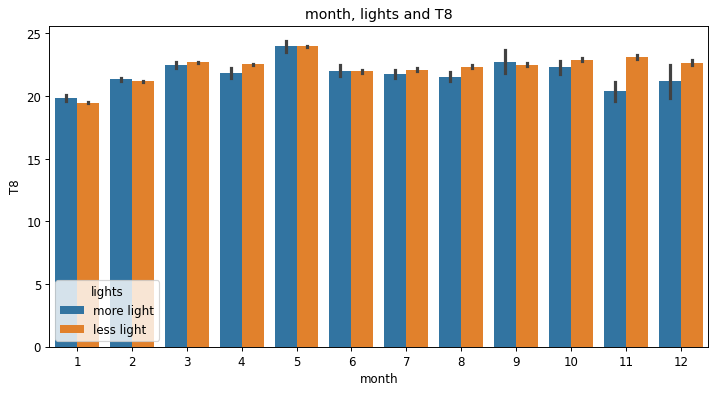

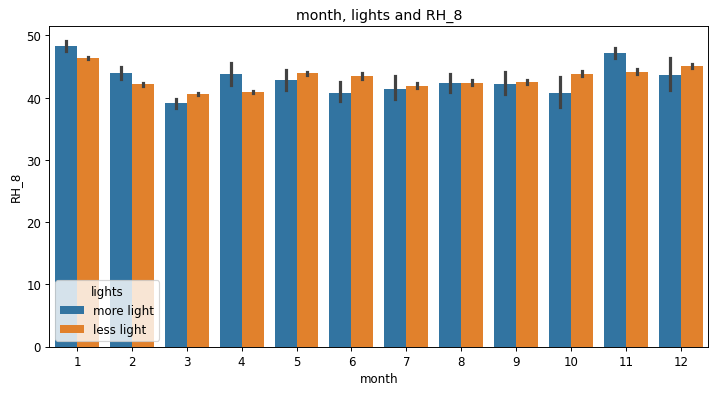

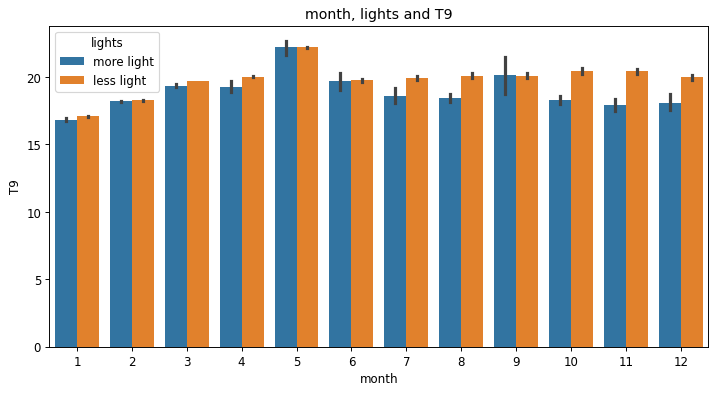

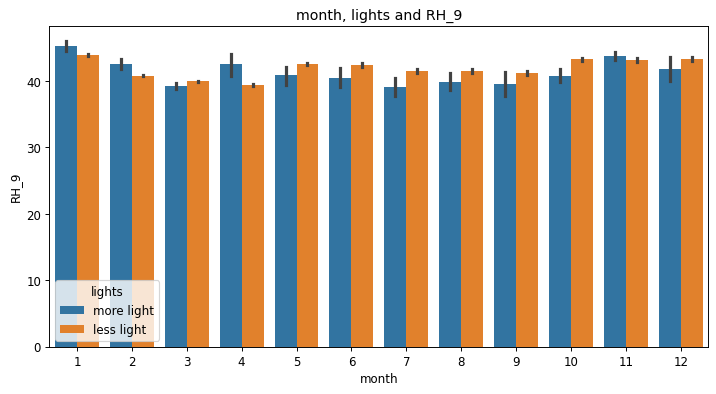

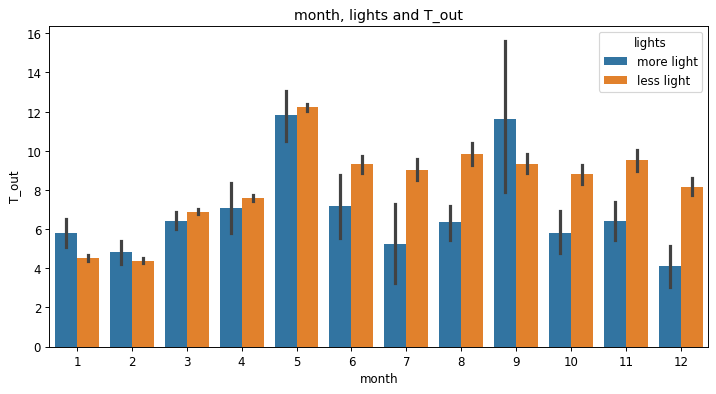

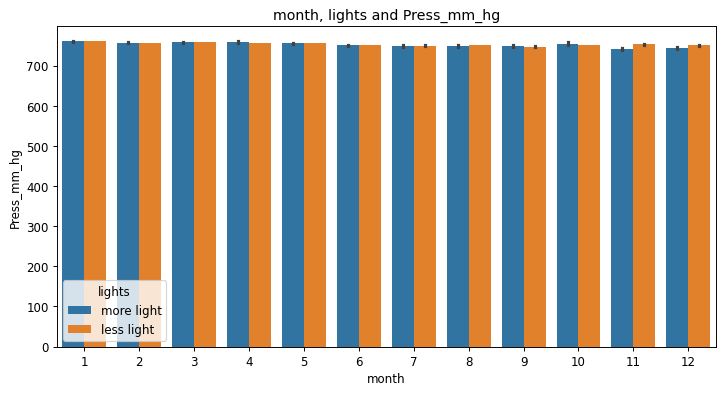

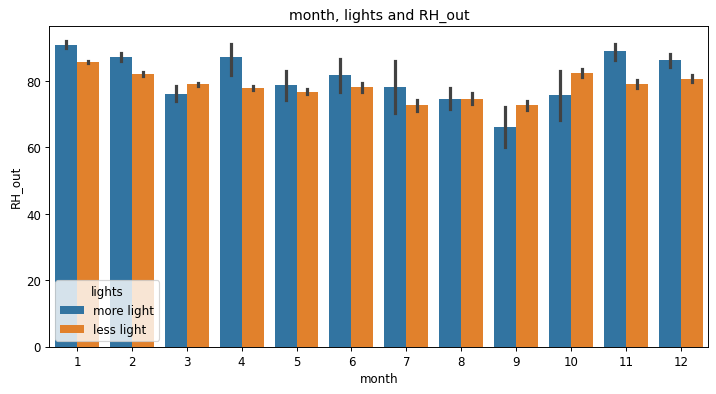

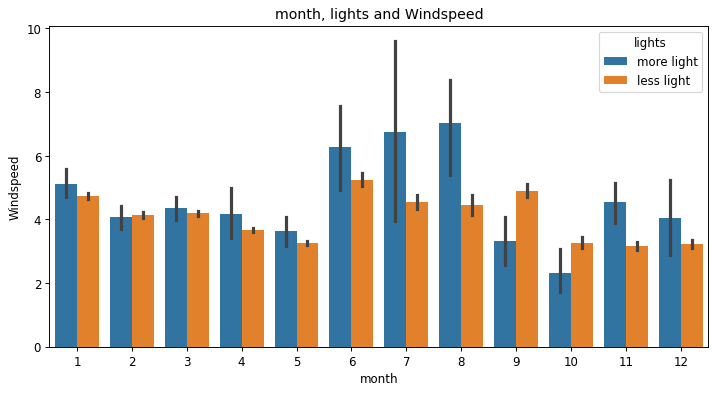

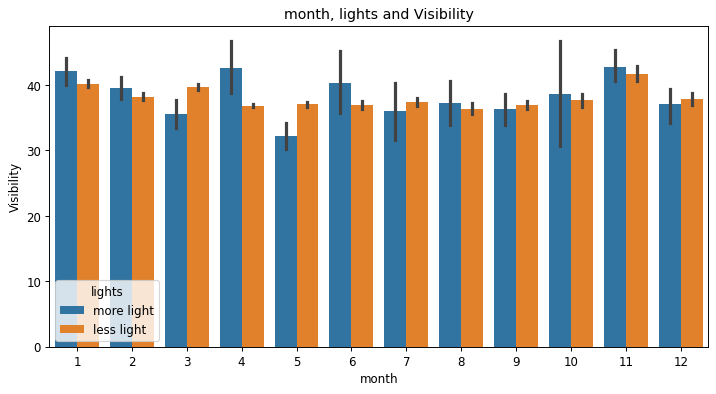

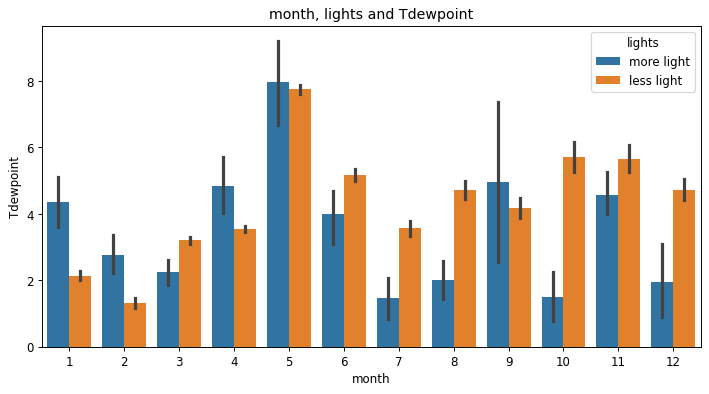

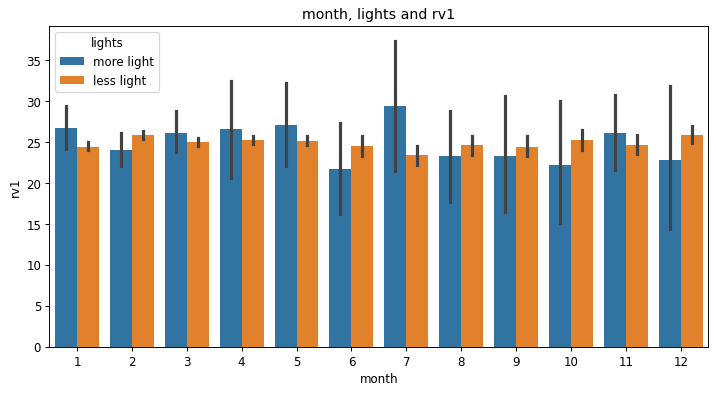

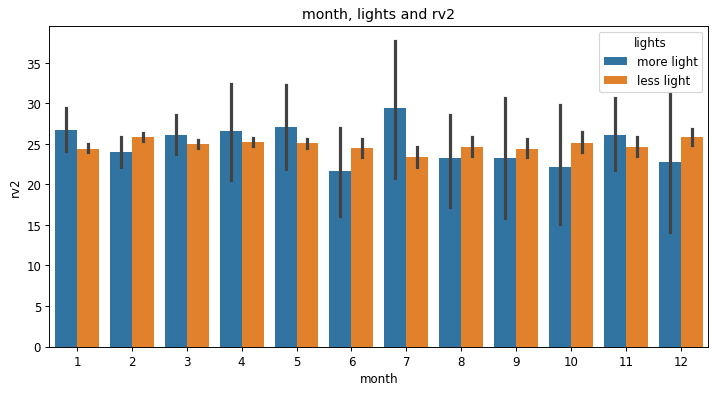

In [28]:
for i in data.drop(columns=['lights','Appliances','year','month']).columns:
    plt.figure(figsize=[10,5],dpi=85)
    sns.barplot(x='month',y=i,hue='lights',data=data)
    plt.title('month, lights and {}'.format(i))

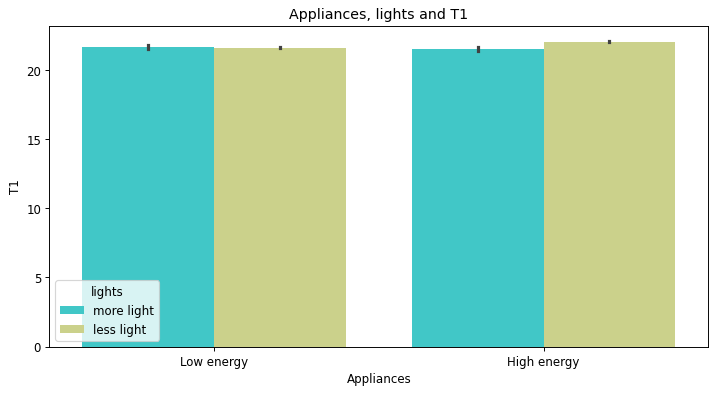

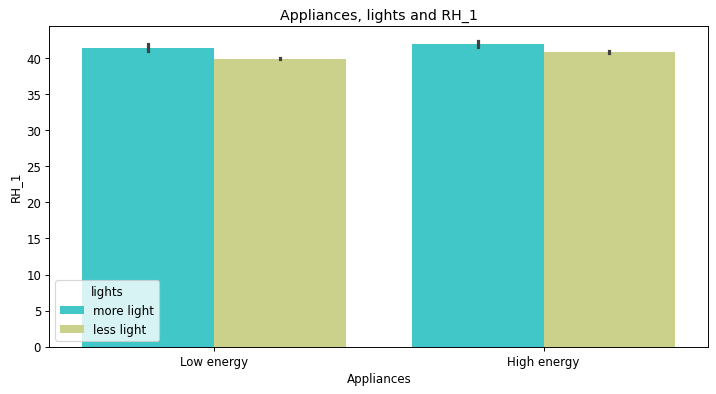

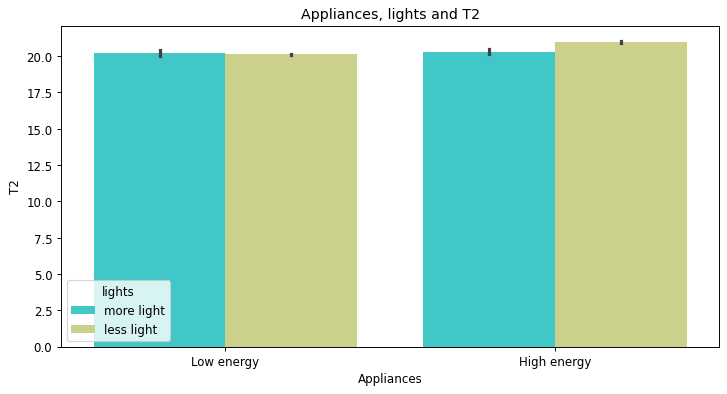

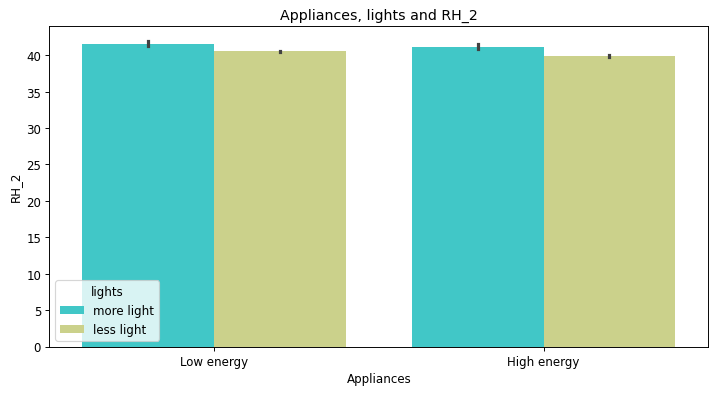

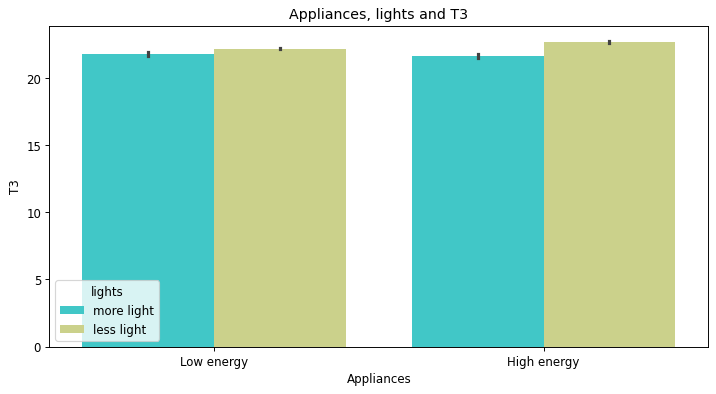

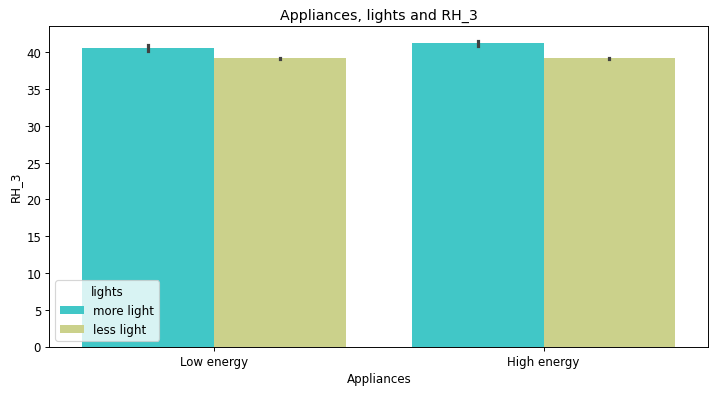

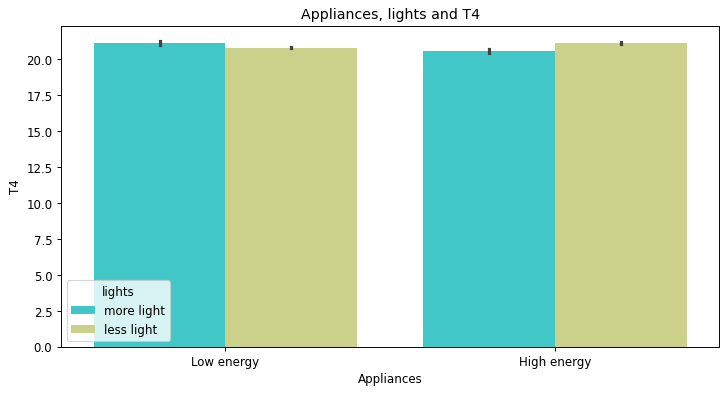

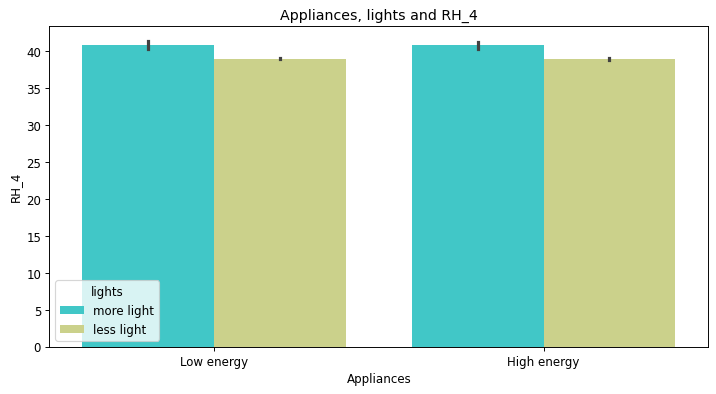

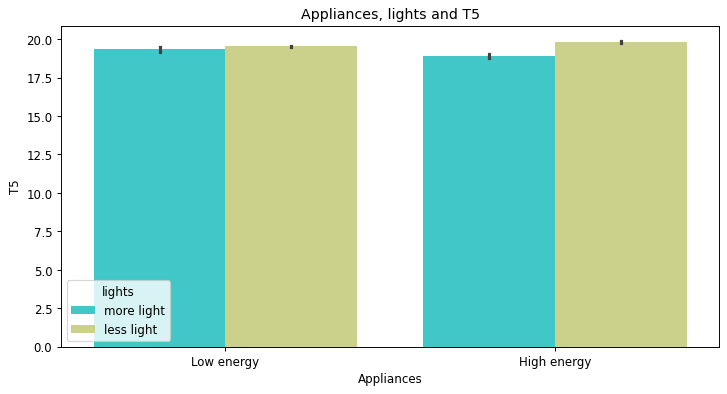

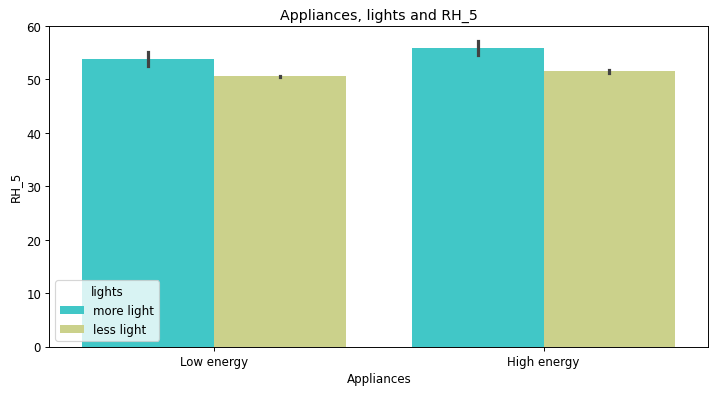

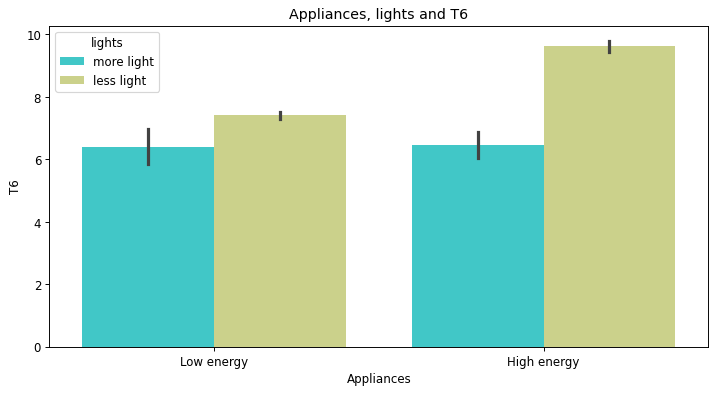

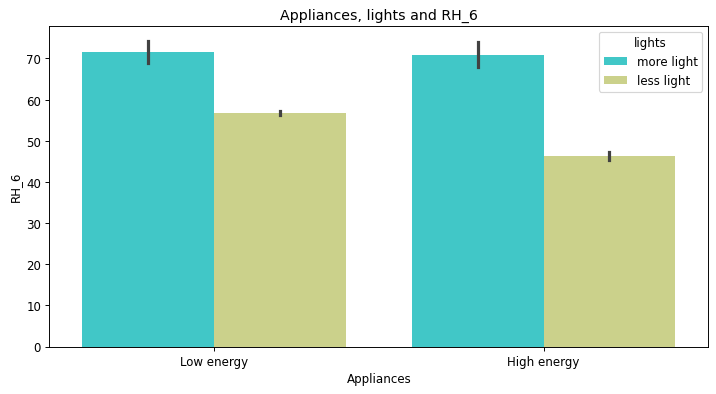

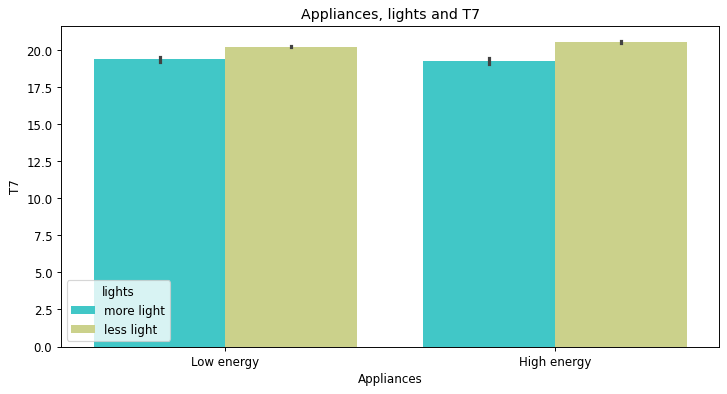

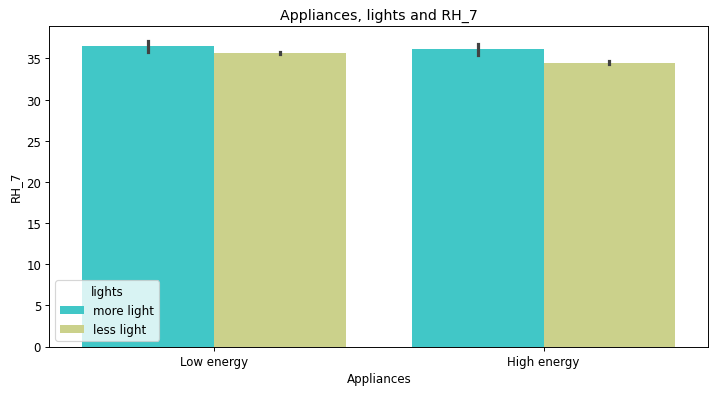

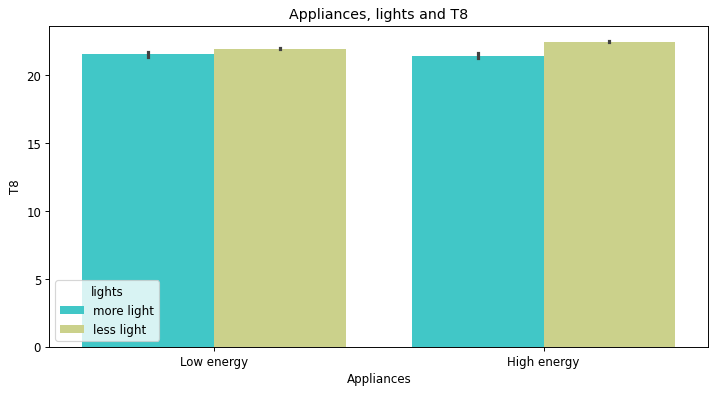

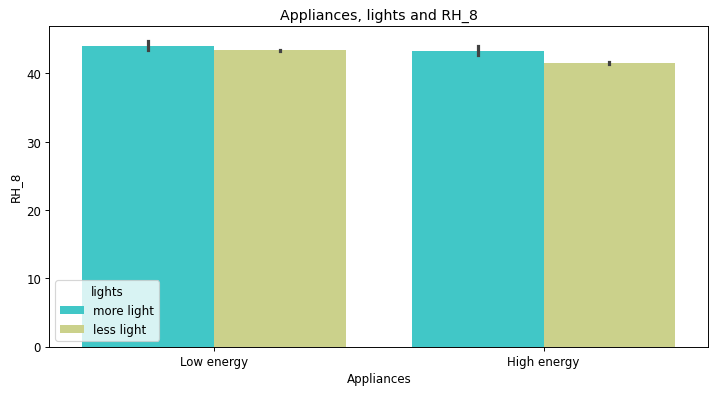

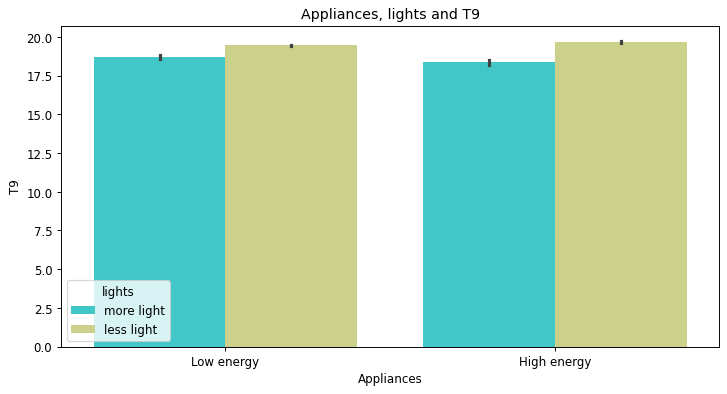

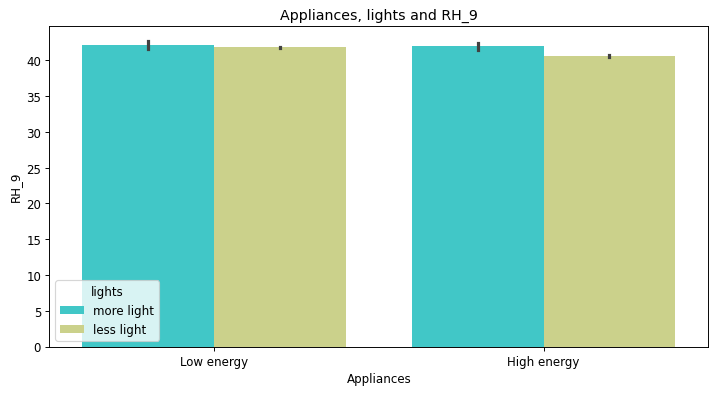

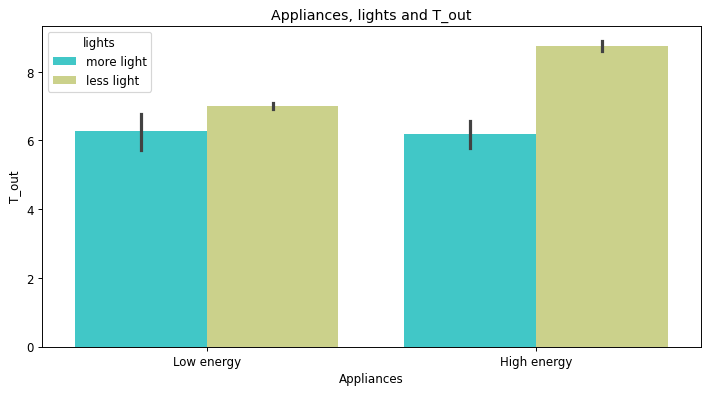

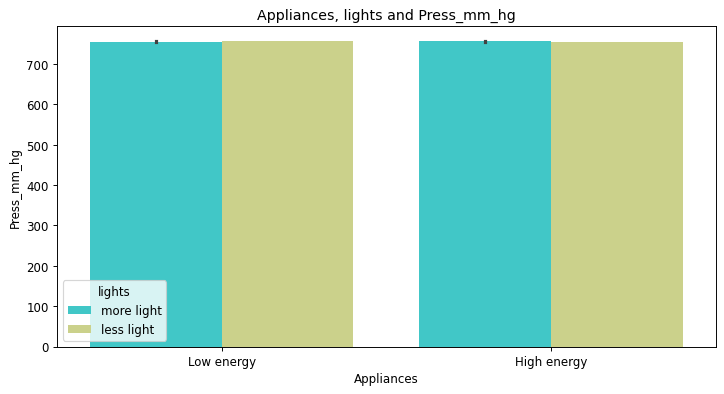

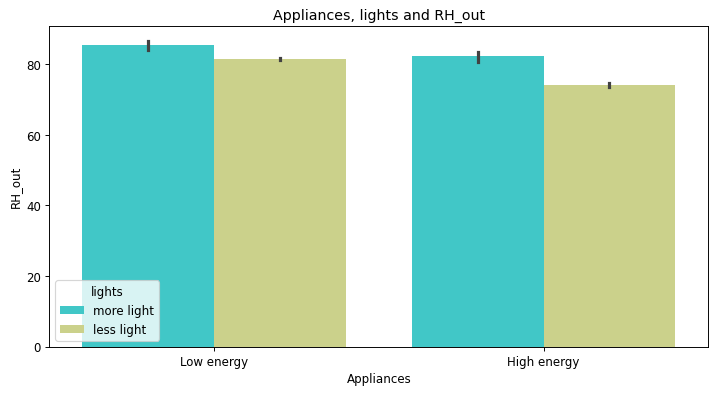

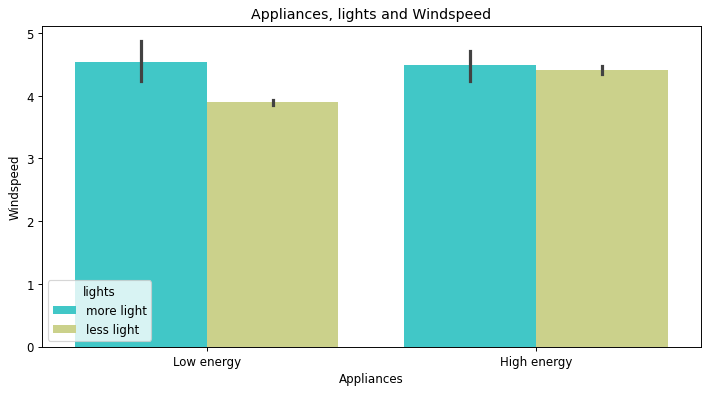

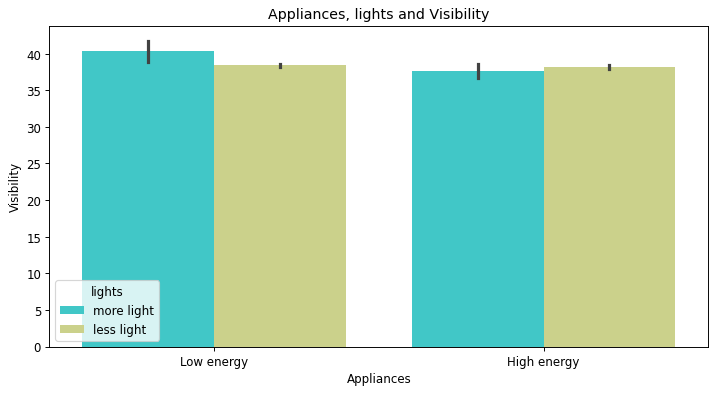

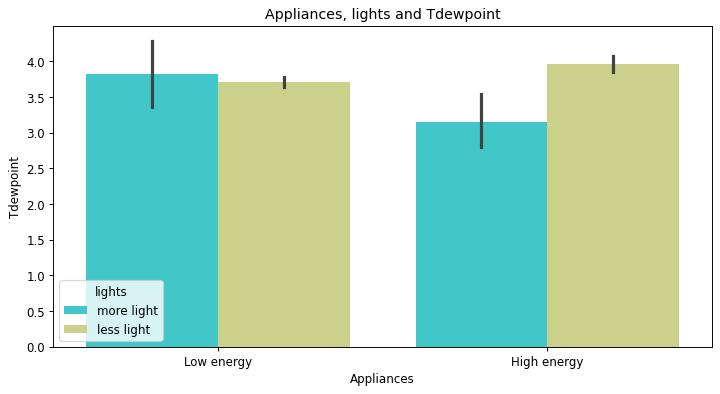

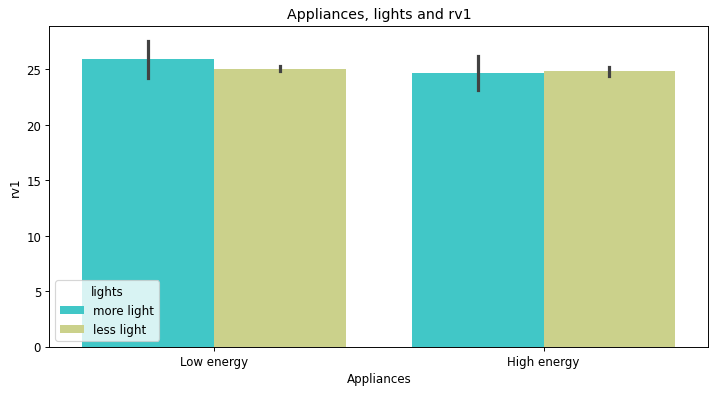

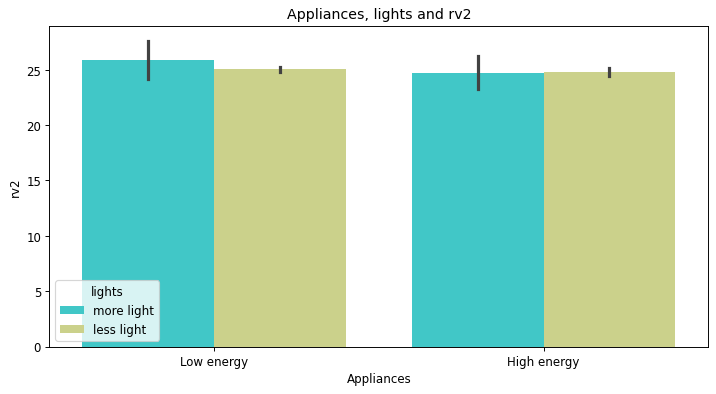

In [29]:
for i in data.drop(columns=['lights','Appliances','year','month']).columns:
    plt.figure(figsize=[10,5],dpi=85)
    sns.barplot(x='Appliances',y=i,hue='lights',data=data,palette='rainbow')
    plt.title('Appliances, lights and {}'.format(i))


# Correlation:

In [34]:
cor=data.corr()

<AxesSubplot:>

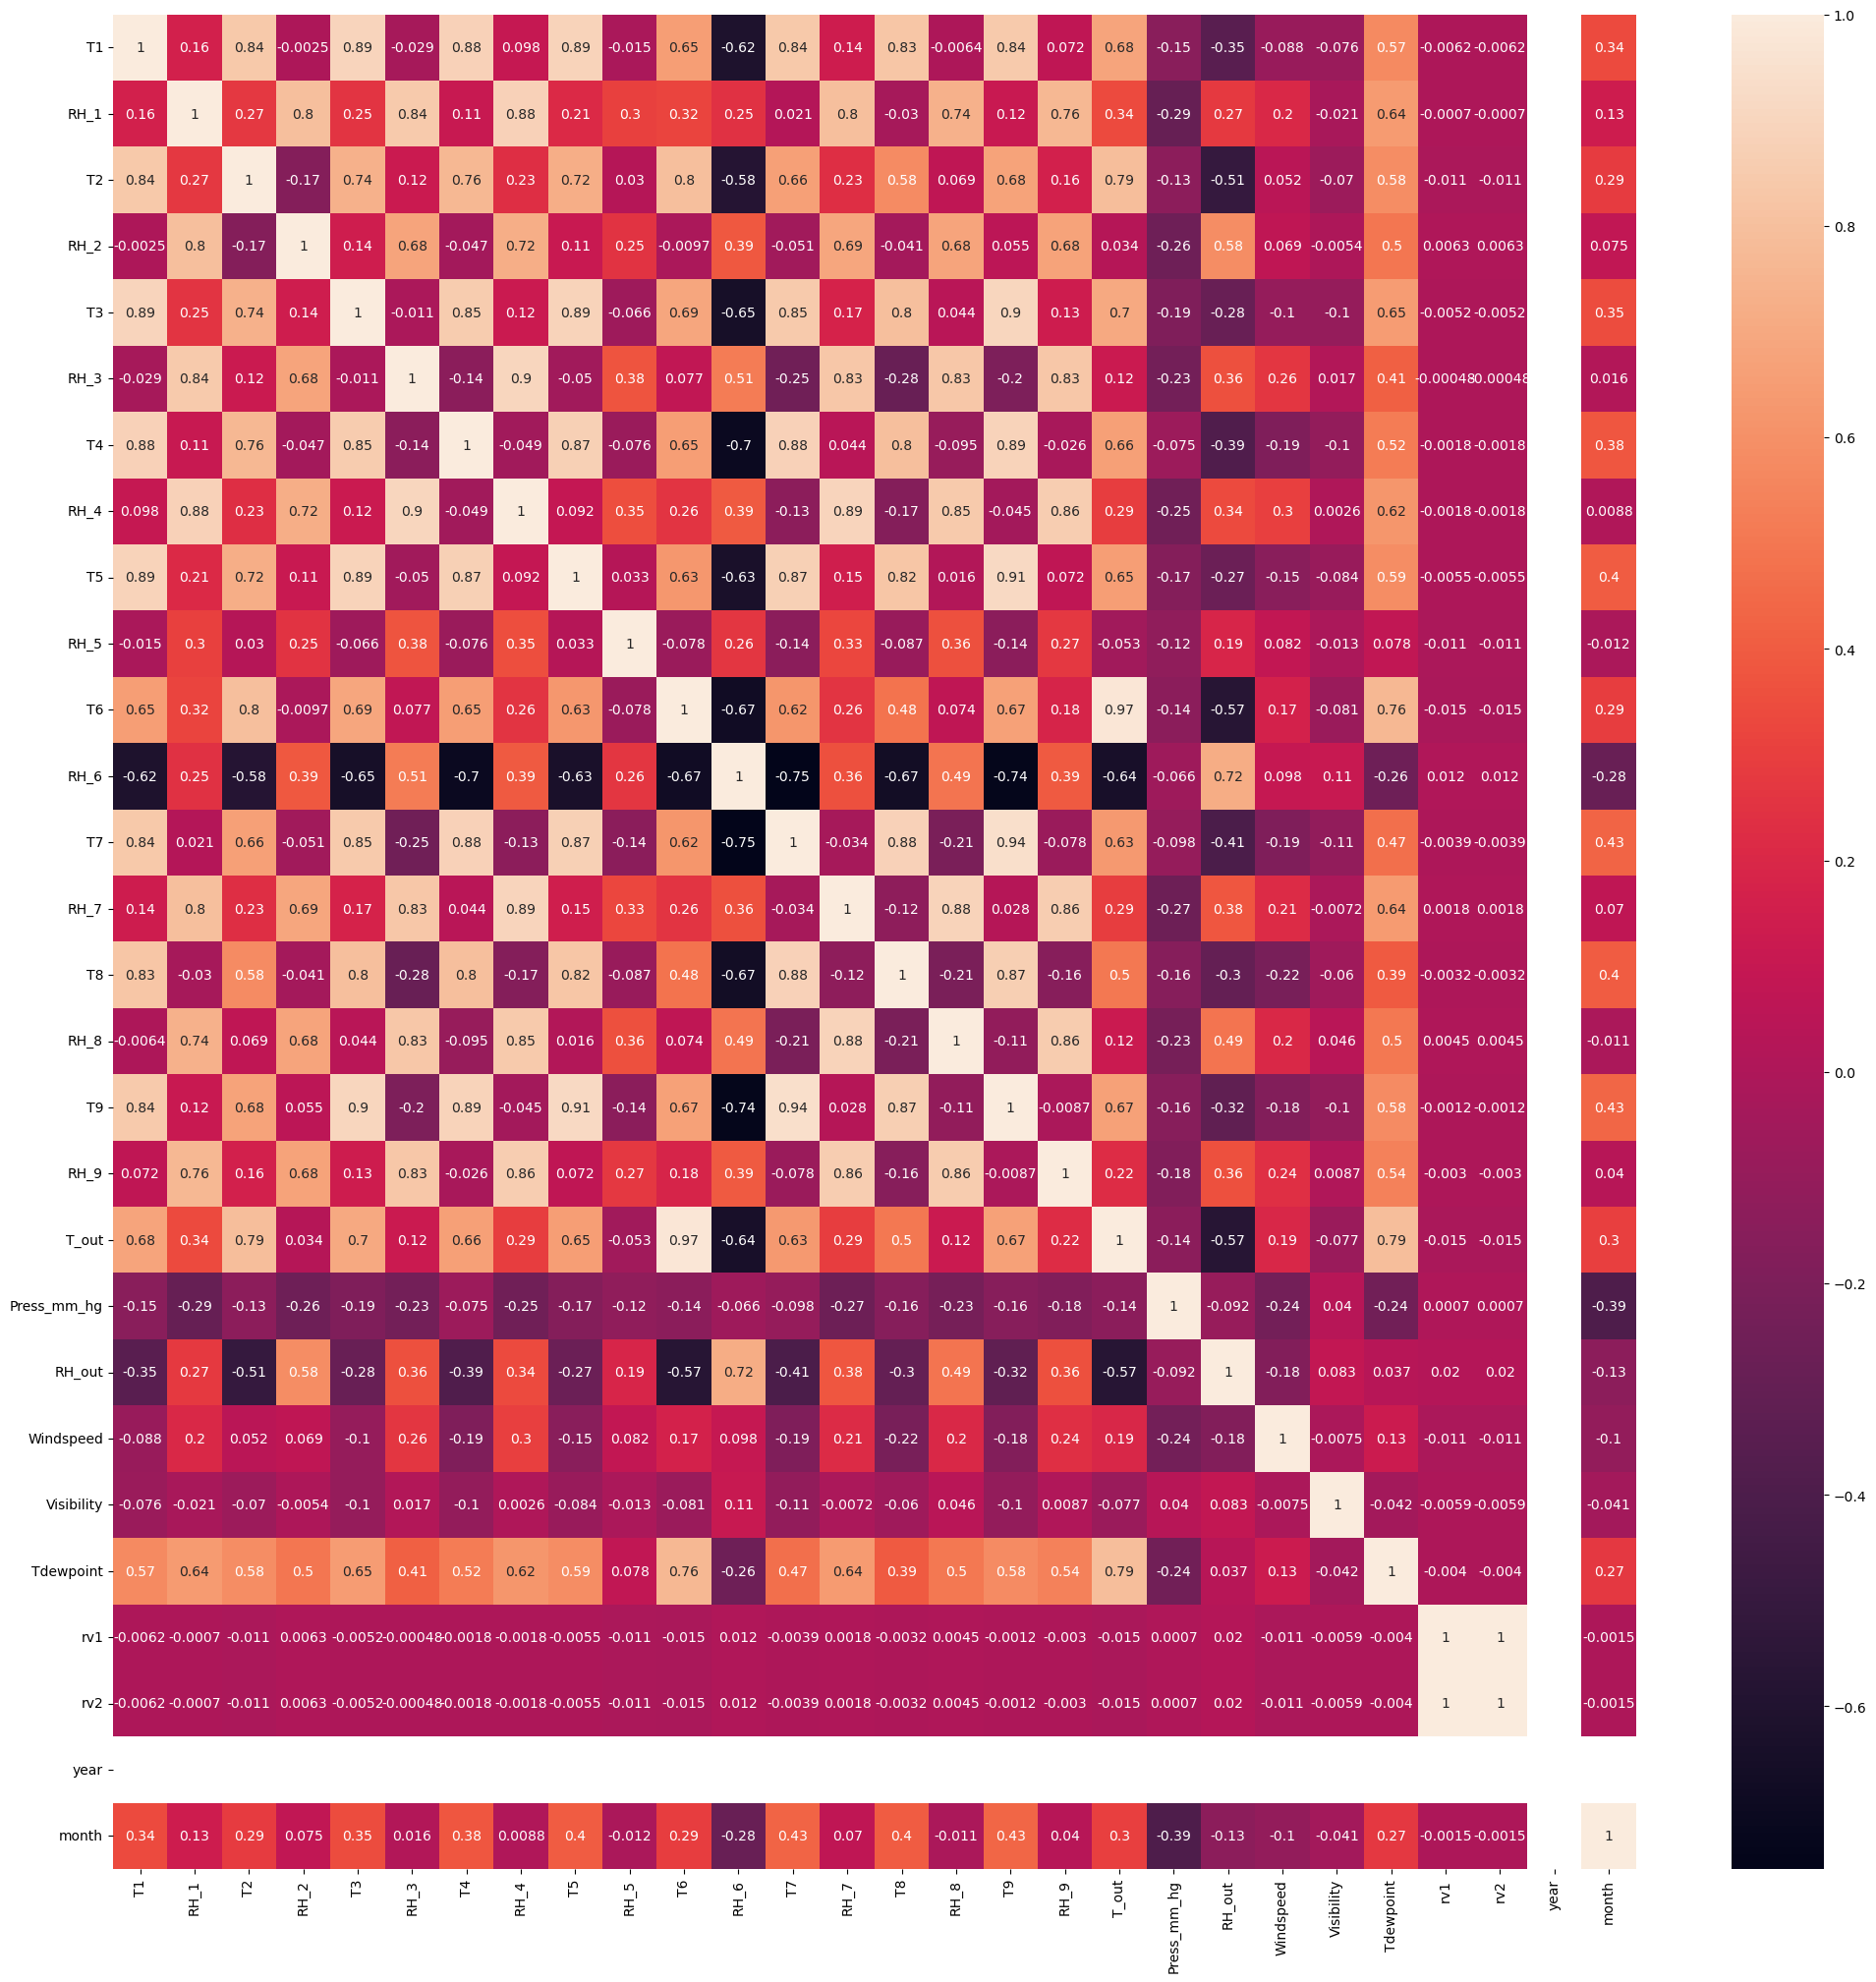

In [35]:
plt.figure(figsize=[25,25],dpi=100)
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)

* Here we observe that there is strong positive correlation between Temperature outside the building(T6) and T_out(i.e. Temperature outside (from Chievres weather station)) means as the temperature outside from weather station increases as the temperature outside the building also increases.

•	Here we observe that there is strong positive correlation between Temperature outside the building(T6) and Tdewpoint (from Chievres weather station) means as the temperature outside the building increases the Tdewpoint is also increases.

•	WE also see the strong positive correlation between T_out(i.e. Temperature outside (from Chievres weather station)) and Tdewpoint (from Chievres weather station)  means as the  T_out increases the Tdewpoint is also increases.

•	In other hand we see the strong negative correlation between the variables T7 (Temperature in ironing room) and RH_6 (Humidity outside the building) means as the temperature  in ironing room increases the Humidity outside the building is decreses. 

# Pre-Processing Data:

In [36]:
X = data.drop(columns = ['Appliances','lights','year','month'])
y = data['Appliances']

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size = 0.3, random_state = 42)

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

In [39]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(13814, 26)
(13814,)
(5921, 26)
(5921,)


# Modelling:

# 1)Logistic Regression:

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [41]:
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_test, y_test))

Training accuracy : 0.7915158534819748
Testing accuracy  : 0.7968248606654281


In [42]:
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)

[[ 640  923]
 [ 280 4078]]


In [43]:
print('Classification report for train data is : \n',
      classification_report(y_train, y_pred_train))

print('\n')
print('Classification report for test data is : \n',
      classification_report(y_test, y_pred_test))

Classification report for train data is : 
               precision    recall  f1-score   support

 High energy       0.68      0.39      0.50      3648
  Low energy       0.81      0.94      0.87     10166

    accuracy                           0.79     13814
   macro avg       0.75      0.66      0.68     13814
weighted avg       0.78      0.79      0.77     13814



Classification report for test data is : 
               precision    recall  f1-score   support

 High energy       0.70      0.41      0.52      1563
  Low energy       0.82      0.94      0.87      4358

    accuracy                           0.80      5921
   macro avg       0.76      0.67      0.69      5921
weighted avg       0.78      0.80      0.78      5921



# Decision tree classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [45]:
y_pred_dtc_train = dtc.predict(x_train)
y_pred_dtc_test  = dtc.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_dtc_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_dtc_test, y_test))

Training accuracy : 1.0
Testing accuracy  : 0.8731633170072622


In [46]:
cm_test = confusion_matrix(y_test, y_pred_dtc_test)
print(cm_test)

[[1181  382]
 [ 369 3989]]


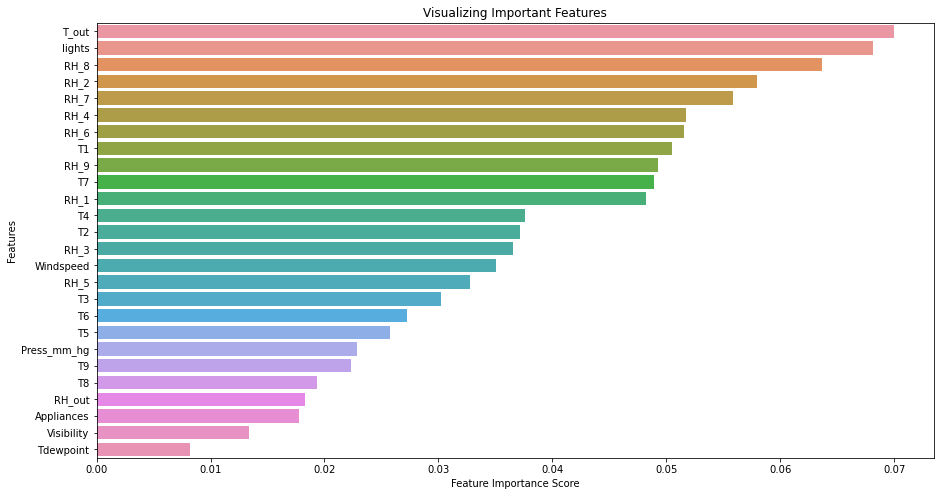

In [49]:
importance = dtc.feature_importances_
feature_imp = pd.Series(importance, index = data.columns[:26]).sort_values(ascending = False)
feature_imp
plt.figure(figsize = (15, 8))
# Visualize the Importance Creating a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [48]:
y_pred_rfc_train = rfc.predict(x_train)
y_pred_rfc_test  = rfc.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_rfc_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_rfc_test, y_test))

Training accuracy : 1.0
Testing accuracy  : 0.9103192028373586


In [49]:
cm_test = confusion_matrix(y_test, y_pred_rfc_test)
print(cm_test)

[[1255  308]
 [ 223 4135]]


# SVM

In [50]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [51]:
y_pred_svm_train = svm.predict(x_train)
y_pred_svm_test  = svm.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_svm_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_svm_test, y_test))

Training accuracy : 0.8492833357463443
Testing accuracy  : 0.8397230197601756


In [52]:
print('Classification report for train data is : \n',
      classification_report(y_train, y_pred_svm_train))

print('\n')
print('Classification report for test data is : \n',
      classification_report(y_test, y_pred_svm_test))

Classification report for train data is : 
               precision    recall  f1-score   support

 High energy       0.81      0.56      0.66      3648
  Low energy       0.86      0.95      0.90     10166

    accuracy                           0.85     13814
   macro avg       0.84      0.76      0.78     13814
weighted avg       0.85      0.85      0.84     13814



Classification report for test data is : 
               precision    recall  f1-score   support

 High energy       0.78      0.54      0.64      1563
  Low energy       0.85      0.95      0.90      4358

    accuracy                           0.84      5921
   macro avg       0.82      0.74      0.77      5921
weighted avg       0.83      0.84      0.83      5921

